<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Bibliotecas-e-Fun√ß√µes" data-toc-modified-id="Bibliotecas-e-Fun√ß√µes-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Bibliotecas e Fun√ß√µes</a></span></li><li><span><a href="#Entendendo-os-Dados" data-toc-modified-id="Entendendo-os-Dados-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Entendendo os Dados</a></span><ul class="toc-item"><li><span><a href="#Dados-Nulos" data-toc-modified-id="Dados-Nulos-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Dados Nulos</a></span></li><li><span><a href="#Tipos-Primitivos" data-toc-modified-id="Tipos-Primitivos-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Tipos Primitivos</a></span></li><li><span><a href="#Explora√ß√£o-Gr√°fica" data-toc-modified-id="Explora√ß√£o-Gr√°fica-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Explora√ß√£o Gr√°fica</a></span><ul class="toc-item"><li><span><a href="#Evolu√ß√£o-do-E-Commerce-no-Brasil" data-toc-modified-id="Evolu√ß√£o-do-E-Commerce-no-Brasil-2.3.1"><span class="toc-item-num">2.3.1&nbsp;&nbsp;</span>Evolu√ß√£o do E-Commerce no Brasil</a></span></li><li><span><a href="#E-Commerce-nos-Estados-Brasileiros" data-toc-modified-id="E-Commerce-nos-Estados-Brasileiros-2.3.2"><span class="toc-item-num">2.3.2&nbsp;&nbsp;</span>E-Commerce nos Estados Brasileiros</a></span></li><li><span><a href="#Formas-de-Pagamento-Online" data-toc-modified-id="Formas-de-Pagamento-Online-2.3.3"><span class="toc-item-num">2.3.3&nbsp;&nbsp;</span>Formas de Pagamento Online</a></span></li><li><span><a href="#Categorias-de-Produtos" data-toc-modified-id="Categorias-de-Produtos-2.3.4"><span class="toc-item-num">2.3.4&nbsp;&nbsp;</span>Categorias de Produtos</a></span></li><li><span><a href="#Review-Score" data-toc-modified-id="Review-Score-2.3.5"><span class="toc-item-num">2.3.5&nbsp;&nbsp;</span>Review Score</a></span></li></ul></li></ul></li><li><span><a href="#Processamento-de-Linguagem-Natural" data-toc-modified-id="Processamento-de-Linguagem-Natural-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Processamento de Linguagem Natural</a></span><ul class="toc-item"><li><span><a href="#Contato-Inicial-com-o-Dataset" data-toc-modified-id="Contato-Inicial-com-o-Dataset-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Contato Inicial com o Dataset</a></span></li><li><span><a href="#RegEx" data-toc-modified-id="RegEx-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>RegEx</a></span></li><li><span><a href="#Stop-Words" data-toc-modified-id="Stop-Words-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Stop Words</a></span></li></ul></li></ul></div>

Este notebook tem por objetivo alocar o desenvolvimento pr√°tico envolvendo m√∫ltiplos conjuntos de dados contendo informa√ß√µes a respeito do E-Commerce do Brasil, dentro de um contexto relacionado ao trabalho final da mat√©ria de Processamento de Linguagem Natural ministrada na UFABC pelo professor Jes√∫s Mena.

Os dados p√∫blicos levantados pela empresa _Olist_ contemplam aproximadamente 100.000 registros de pediso on-line (e an√¥nimos) dispostos em 8 diferentes datasets. Essa implementa√ß√£o visa realizar um estudo nos dados contidos nestes conjuntos com √™nfase na aplica√ß√£o de t√©cnicas de PLN para an√°lise e classifica√ß√£o de sentimentos de clientes coletados atrav√©s das cr√≠ticas postadas antes, durante ou ap√≥s aquisi√ß√µes on-line.

Link do dataset: [Kaggle-Brazilian-e-commerce](https://www.kaggle.com/olistbr/brazilian-ecommerce#olist_orders_dataset.csv)

# Bibliotecas e Fun√ß√µes

In [7]:
# Importando bibliotecas
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.gridspec import GridSpec
import missingno as msno
import re
from collections import Counter
import nltk
from nltk.corpus import stopwords
import string
from nltk.stem import PorterStemmer, LancasterStemmer, RegexpStemmer, SnowballStemmer

In [8]:
# Fun√ß√µes
def format_spines(ax, right_border=True):
    """
    Fun√ß√£o respons√°vel por formatar os eixos dos gr√°ficos
    
    Input:
        ax: matplotlib axis
        right_border: flag booleano que indica a presen√ßa ou n√£o da borda direita
    
    Output:
        None
    """    
    ax.spines['bottom'].set_color('#CCCCCC')
    ax.spines['left'].set_color('#CCCCCC')
    ax.spines['top'].set_visible(False)
    if right_border:
        ax.spines['right'].set_color('#CCCCCC')
    else:
        ax.spines['right'].set_color('#FFFFFF')
    ax.patch.set_facecolor('#FFFFFF')
    
def bar_plot(x, y, df, ax, colors='Blues_d', hue=False, value=False):
    """
    Fun√ß√£o respons√°vel por plotar, configurar e personalizar um gr√°fico de barras

    Input:
        x: feature a ser plotada no eixo x
        y: feature a ser plotada no eixo y
        df: dataframe utilizado
        colors: palette padr√£o "Blues_d"
        hue: feature de separa√ß√£o, padr√£o False
        value: flag que define se o r√≥tulo das barras ser√° valor (True) ou porcentagem (False)
        
    Returns:
        None
    """
    # Realizando contagem da feature num√©rica (em x ou em y)
    try:
        ncount = sum(df[y])
    except:
        ncount = sum(df[x])
    
    # Plotando gr√°fico no eixo
    if hue != False:
        ax = sns.barplot(x=x, y=y, data=df, palette=colors, hue=hue, ax=ax, ci=None)
    else:
        ax = sns.barplot(x=x, y=y, data=df, palette=colors, ax=ax, ci=None)

    # Configurando porcentagem ou valor
    for p in ax.patches:
        xp=p.get_bbox().get_points()[:,0]
        yp=p.get_bbox().get_points()[1,1]
        if value:
            ax.annotate('{:.2f}k'.format(yp/1000), (xp.mean(), yp), 
                    ha='center', va='bottom')
        else:
            ax.annotate('{:.1f}%'.format(100.*yp/ncount), (xp.mean(), yp), 
                    ha='center', va='bottom')
            
def add_series_working_days(series_name, df, date_col1, date_col2):
    """
    Fun√ß√£o extremamente importante: calcula os dias √∫teis entre duas datas e retorna este valor
    como uma coluna adicional em um dataframe
    
    Input:
        series_names: nome da nova s√©rie criada para alocar a diferen√ßa em dias √∫teis
        df: conjunto de dados onde as colunas de data se encontram
        date_col1: coluna de datas 1
        date_col2: coluna de datas 2
        
    Returns:
        df_return: dataframe com coluna de dias √∫teis j√° inserida
    """
    # Calculando lista com diferen√ßa entre datas
    time_list = []
    idx = 0
    second_date_series = df[date_col2].values.astype('datetime64[D]')
    for date in df[date_col1].values.astype('datetime64[D]'):
        second_date = second_date_series[idx]
        try:
            workdays = np.busday_count(date, second_date)
        except:
            workdays = np.NaN
        time_list.append(workdays)
        idx += 1
    
    # Adicionando ao dataframe e eliminando valores nulos
    df_return = df.copy()
    df_return[series_name] = pd.Series(time_list)
    df_return.dropna(inplace=True)
    
    return df_return

def communicate_params(frete, entrega, estimativa):
    """
    Fun√ß√£o adicional criada para auxiliar na plotagem gr√°fica do dashboard de an√°lise por estado
    
    Input:
        frete: valor do frete a ser plotado no gr√°fico em formato de texto
        entrega: tempo m√©dio de entrega a ser plotado no gr√°fico em formato de texto
        estimativa: diferen√ßa entre estimativa e entrega ser plotada no gr√°fico em formato de texto
    
    Returns:
        None
    """
    # 
    """axs[0, 0].text(0.5, 0.12, str(f'Frete M√©dio \nR${frete:.2f}'),
                   fontsize=13, ha='center')
    axs[0, 0].axis('off')"""
    
    # Comunicando frete m√©dio
    ax1.text(0.23, 0.6, f'R${frete:.2f}', fontsize=65)
    ax1.text(0.22, 0.45, '√© o valor m√©dio de frete', fontsize=12)
    ax1.text(0.24, 0.4, 'para compras online', fontsize=12)
    ax1.axis('off')
    
    # Comunicando tempo m√©dio de entrega
    axs[0, 1].text(0.5, 0.12, 
                   str(f'Tempo M√©dio de Entrega \n{int(entrega)} dias √∫teis.'),
                   fontsize=13, ha='center')
    axs[0, 1].axis('off')
    
    # Comunicando diferen√ßa entre tempo de entrega e tempo estimado
    if mean_diff_estimative > 0:
        inf = 'antes'
    else:
        inf = 'depois'
    text_diff_estimative = f'Em m√©dia, entregas \nacontecem {int(estimativa)} dias √∫teis \
\n{inf} do per√≠odo estimado.'
    axs[0, 2].text(0.5, 0.10, 
                   str(text_diff_estimative), fontsize=13, ha='center')
    axs[0, 2].axis('off')
    
def plot_param(df, col, title, xlim, n_row, n_col, y='customer_state', div_xlim=0, 
               one_axis=False, xlabel=[], ylabel='Estado'):
    """
    Fun√ß√£o utilizada para plotar um estudo comparativo de acordo com o tema, 
    separando an√°lises de dos 5 Melhores e 5 Piores em assuntos pr√©-determinados
    
    Input:
        df: dataframe com as informa√ß√µes
        col: coluna com a informa√ß√£o a ser analisada
        title: t√≠tulo da an√°lise
        xlim: limite no eixo X dos n√∫meros
        n_row: √≠ndice da linha onde a plotagem ser√° realizada
        n_col: √≠ndice da coluna onde a plotagem ser√° realizada
    """
    # Configurando eixos
    if one_axis:
        ax_top = axs[n_col]
        ax_last = axs[n_col+1]
    else:
        ax_top = axs[n_row, n_col]
        ax_last = axs[n_row+1, n_col]
    
    # Primeiro passo: plotando Top 5
    df.sort_values(by=col, ascending=False, inplace=True)
    top5 = df.iloc[:5, :]
    sns.barplot(x=col, y=y, data=top5, ci=None, palette='Blues_d', ax=ax_top)
    format_spines(ax_top, right_border=False)
    ax_top.set_title(title)
    ax_top.set_xlim(0, xlim)
    ax_top.set_xlabel(xlabel)
    if n_col > 0:
        ax_top.set_ylabel('')
    else:
        ax_top.set_ylabel(ylabel)
    
    # Segundo passo: plotando Top 5 inverso
    last5 = df.iloc[-5:, :]
    sns.barplot(x=col, y=y, data=last5, ci=None, palette='Blues_d', ax=ax_last)
    format_spines(ax_last, right_border=False)
    ax_last.set_title(title.replace('Maior', 'Menor'))
    if div_xlim > 0:
        ax_last.set_xlim(0, xlim/div_xlim)
    else:
        ax_last.set_xlim(0, xlim)
    ax_last.set_xlabel(xlabel)
    if n_col > 0:
        ax_last.set_ylabel('')
    else:
        ax_last.set_ylabel(ylabel)
        
def donut_plot(col, ax, df, labels, text='', flag_ruido = 0,
               colors=['navy', 'lightsteelblue', 'lightgreen', 'crimson', '']):
    """
    Fun√ß√£o respons√°vel por plotar um gr√°fico de rosca customizado
    
    Input:
        col: coluna a ser analisada e plotada no gr√°fico de rosca
        ax: matplotlib axis
        df: DataFrame contendo os dados
        labels: √≠ndice de labels da coluna a ser plotada
        text: texto a ser plotado no centro do gr√°fico de rosca
        flag_ruido: indica a quantidade de elementos a serem eliminados da plotagem
        colors: lista de cores para plotagem (4 cores default)
    """
    flag_ruido = flag_ruido * -1
    if flag_ruido < 0:
        sizes = df[col].value_counts().values[:flag_ruido]
        labels = labels[:flag_ruido]
    else:
        sizes = df[col].value_counts().values
    center_circle = plt.Circle((0,0), 0.80, color='white')
    ax.pie(sizes, labels=labels, colors=colors, autopct='%1.2f%%')
    ax.add_artist(center_circle)
    kwargs = dict(size=20, fontweight='bold', va='center')
    ax.text(0, 0, text, ha='center', **kwargs)
    
def text_process(c):
    """
    Fun√ß√£o respons√°vel por remover as pontua√ß√µes e as stopwords das cr√≠ticas.
    
    Input:
        c: cr√≠tica do cliente
    
    Output:
        lista sem pontua√ß√£o e sem stopwords
    """
    # Retira pontua√ß√µes
    nopunc = [char for char in c if char not in string.punctuation]

    # Junta-os para formar strings
    nopunc = ''.join(nopunc)
    
    # Remove as stopwords
    return [word.lower() for word in nopunc.split() if word.lower() not in stopwords.words('portuguese')]

def stem_processing(c):
    """
    Fun√ß√£o respons√°vel por realizar o stemming nas cr√≠ticas.
    
    Input:
        c: cr√≠tica do cliente
    
    Output:
        critica aplicado stemming
    """
    
    stemmer = PorterStemmer()
    return map(lambda word: stemmer.stem(word),[word for word in c])

# Entendendo os Dados

Datasets dispon√≠veis:

    olist_customers_dataset.csv
    olist_geolocation_dataset.csv
    olist_orders_dataset.csv
    olist_order_items_dataset.csv
    olist_order_payments_dataset.csv
    olist_order_reviews_dataset.csv
    olist_products_dataset.csv
    olist_sellers_dataset.csv
    product_category_name_translation.csv

<img src="images/brazilian_e-commerce_schema.png" alt="Dataset Schema" style="width: 750px;"/>

Acima, √© poss√≠vel visualizar um modelo que transcreve o problema de neg√≥cio. A rela√ß√£o entre os datasets √© dada atrav√©s de chaves estrangeiras contidas em cada um dos conjuntos, sendo necess√°ria a aplica√ß√£o de m√©todos espec√≠ficos (join, concat, entre outros) para a efetiva uni√£o e posterior an√°lise dos conjuntos. Neste primeiro momento, vamos ler os conjuntos de dados e verificar as dimens√µes de cada um deles.

In [9]:
# Lendo arquivos
olist_customer = pd.read_csv('olist_customers_dataset.csv')
olist_geolocation = pd.read_csv('olist_geolocation_dataset.csv')
olist_orders = pd.read_csv('olist_orders_dataset.csv')
olist_order_items = pd.read_csv('olist_order_items_dataset.csv')
olist_order_payments = pd.read_csv('olist_order_payments_dataset.csv')
olist_order_reviews = pd.read_csv('olist_order_reviews_dataset.csv')
olist_products = pd.read_csv('olist_products_dataset.csv')
olist_sellers = pd.read_csv('olist_sellers_dataset.csv')

In [10]:
# Exemplo: dataset de pedidos
olist_orders.head()

order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3  949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4  ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   

  order_status order_purchase_timestamp    order_approved_at  \
0    delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
1    delivered      2018-07-24 20:41:37  2018-07-26 03:24:27   
2    delivered      2018-08-08 08:38:49  2018-08-08 08:55:23   
3    delivered      2017-11-18 19:28:06  2017-11-18 19:45:59   
4    delivered      2018-02-13 21:18:39  2018-02-13 22:20:29   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2017-10-04 19:55:00           2017-10-10 21:25:13   
1          2018-07-26 14:31:00           2018-08-07 15:27:45   
2          2018-08-08 13:50:00           2018-08-17 18:06:29   
3          2017-11-22 13:39:59           2017-12-02 00:28:42   
4          2018-02-14 19:46:34           2018-02-16 18:17:02   

  order_estimated_delivery_date  
0           2017-10-18 00:00:00  
1           2018-08-13 00:00:00  
2           2018-09-04 00:00:00  
3           2017-12-15 00:00:00  
4           2018-02-26 00:00:00

In [11]:
# Visualizando colunas em cada um dos conjuntos
dataframes = {
    'Customers': olist_customer,
    'Geolocation': olist_geolocation,
    'Orders': olist_orders,
    'Items': olist_order_items,
    'Payments': olist_order_payments,
    'Reviews': olist_order_reviews,
    'Products': olist_products,
    'Sellers': olist_sellers
}

for name, df in dataframes.items():
    print(f'{name}: {len(df.columns)} colunas')
    print(f'{list(df.columns)}\n')

Customers: 5 colunas
['customer_id', 'customer_unique_id', 'customer_zip_code_prefix', 'customer_city', 'customer_state']

Geolocation: 5 colunas
['geolocation_zip_code_prefix', 'geolocation_lat', 'geolocation_lng', 'geolocation_city', 'geolocation_state']

Orders: 8 colunas
['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date']

Items: 7 colunas
['order_id', 'order_item_id', 'product_id', 'seller_id', 'shipping_limit_date', 'price', 'freight_value']

Payments: 5 colunas
['order_id', 'payment_sequential', 'payment_type', 'payment_installments', 'payment_value']

Reviews: 7 colunas
['review_id', 'order_id', 'review_score', 'review_comment_title', 'review_comment_message', 'review_creation_date', 'review_answer_timestamp']

Products: 9 colunas
['product_id', 'product_category_name', 'product_name_lenght', 'product_description_lenght', 'product_photos_qty

In [12]:
# Chaves estrangeiras
for name, df in dataframes.items():
    chaves = [col for col in df.columns if '_id' in col or 'code' in col]
    print(f'{name}: {len(chaves)} chaves PK ou FK')
    print(f'{chaves}\n')

Customers: 3 chaves PK ou FK
['customer_id', 'customer_unique_id', 'customer_zip_code_prefix']

Geolocation: 1 chaves PK ou FK
['geolocation_zip_code_prefix']

Orders: 2 chaves PK ou FK
['order_id', 'customer_id']

Items: 4 chaves PK ou FK
['order_id', 'order_item_id', 'product_id', 'seller_id']

Payments: 1 chaves PK ou FK
['order_id']

Reviews: 2 chaves PK ou FK
['review_id', 'order_id']

Products: 1 chaves PK ou FK
['product_id']

Sellers: 2 chaves PK ou FK
['seller_id', 'seller_zip_code_prefix']



## Dados Nulos

Vamos verificar a presen√ßa de dados nulos em uma vis√£o macro, considerando os datasets como um todo

In [13]:
# Em quais datasets existem dados nulos?
for name, df in dataframes.items():
    print(f'{name:<11} - {df.isnull().any().any()}')

Customers   - False
Geolocation - False
Orders      - True
Items       - False
Payments    - False
Reviews     - True
Products    - True
Sellers     - False


Vamos agora quantificar os dados nulos em todos os conjuntos

In [14]:
# Quantificando dados nulos
for name, df in dataframes.items():
    if df.isnull().any().any():
        print(f'Dataset: {name}\n')
        print(f'{df.isnull().sum()}\n')

Dataset: Orders

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

Dataset: Reviews

review_id                      0
order_id                       0
review_score                   0
review_comment_title       88285
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

Dataset: Products

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64



* Os dados nulos no dataset **Orders** s√£o dados por:

    - Pedidos sem data de aprova√ß√£o;
    - Pedidos que n√£o foram entregues na transportadora;
    - Pedidos ainda n√£o entregues aos clientes.


* Os dados nulos no dataset **Reviews** s√£o dados por:
    - Pedidos sem coment√°rios;
    - Coment√°rios postados sem t√≠tulo;


* Os dados nulos no dataset **Produtos** s√£o dados por:
    - Produtos sem categoria, sem informa√ß√µes de nome, descri√ß√£o, fotos e atributos

## Tipos Primitivos

Ainda trabalhando nos passos precedentes a an√°lise explorat√≥ria e posterior implementa√ß√£o das t√©cnicas de PLN para classifica√ß√£o de sentimentos, √© preciso verificar os tipos primitivos dos dados para aplicar as transforma√ß√µes que se fizerem necess√°rias

In [15]:
# Verificando tipos primitivos
for name, df in dataframes.items():
    print(f'Dataset: {name}\n')
    print(f'{df.dtypes}\n')

Dataset: Customers

customer_id                 object
customer_unique_id          object
customer_zip_code_prefix     int64
customer_city               object
customer_state              object
dtype: object

Dataset: Geolocation

geolocation_zip_code_prefix      int64
geolocation_lat                float64
geolocation_lng                float64
geolocation_city                object
geolocation_state               object
dtype: object

Dataset: Orders

order_id                         object
customer_id                      object
order_status                     object
order_purchase_timestamp         object
order_approved_at                object
order_delivered_carrier_date     object
order_delivered_customer_date    object
order_estimated_delivery_date    object
dtype: object

Dataset: Items

order_id                object
order_item_id            int64
product_id              object
seller_id               object
shipping_limit_date     object
price                  float64
frei

As colunas a seguir devem ser transformadas para o tipo *datetime*:

    order_purchase_timestamp
    order_approved_at
    order_delivered_carrier_date
    order_delivered_customer_date
    order_estimated_delivery_date

In [16]:
# Aplicando transforma√ß√µes
time_cols = ['order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date',
           'order_delivered_customer_date', 'order_estimated_delivery_date']
for col in time_cols:
    olist_orders[col] = pd.to_datetime(olist_orders[col])
    
# Verificando
olist_orders.dtypes

order_id                                 object
customer_id                              object
order_status                             object
order_purchase_timestamp         datetime64[ns]
order_approved_at                datetime64[ns]
order_delivered_carrier_date     datetime64[ns]
order_delivered_customer_date    datetime64[ns]
order_estimated_delivery_date    datetime64[ns]
dtype: object

## Explora√ß√£o Gr√°fica

Para que possa ser criado um melhor relacionamento com os dados, objetivando o ganho de insights a respeito do comportamento de clientes que realizam compras on-line, ser√£o propostas an√°lises gr√°ficas. Esta sess√£o √© de extrema import√¢ncia para que, ao serem aplicadas t√©cnicas de PLN para identificar o sentimento de clientes a partir de coment√°rios e cr√≠ticas postadas antes, durante ou ap√≥s as compras, seja captada a ideia final de uma forma mais ampla, auxiliando assim no entendimento dos resultados obtidos.

### Evolu√ß√£o do E-Commerce no Brasil

Sabe-se que a realiza√ß√£o de compras online √© uma modalidade que cresce cada dia mais ao redor do mundo. No Brasil, isso n√£o √© diferente. H√° poucos anos atr√°s, o receio e a sensa√ß√£o de inseguran√ßa eram os principais termos que relacionavam aquisi√ß√µes via e-commerce. Hoje, muitos preferem associar a comodidade e a facilidade para descrever essa modalidade de compra.

Os dados propostos refletem essa an√°lise?

In [17]:
# Criando nova coluna para ano
olist_orders['order_purchase_year'] = \
olist_orders['order_purchase_timestamp'].apply(lambda x: x.year)

# Criando nova coluna para m√™s
olist_orders['order_purchase_month'] = \
olist_orders['order_purchase_timestamp'].apply(lambda x: x.month)

# Criando nova coluna para dia da semana
olist_orders['order_purchase_dayofweek'] = \
olist_orders['order_purchase_timestamp'].apply(lambda x: x.dayofweek)

* **Quantidade de Pedidos por Ano**

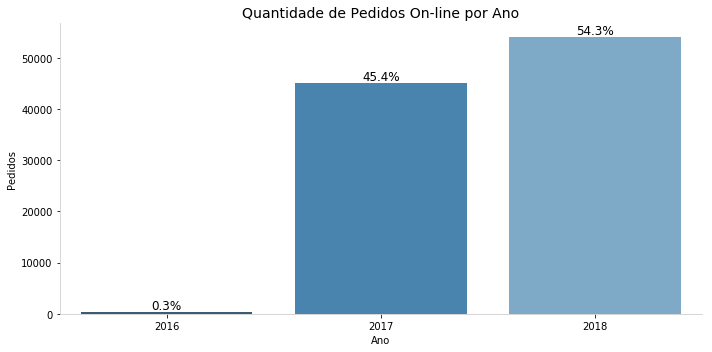

In [18]:
# Preparando plotagem
fig, ax = plt.subplots(figsize=(10, 5))
ax = sns.countplot(x='order_purchase_year', data=olist_orders, palette='Blues_d')
format_spines(ax, right_border=False)

# Mostrando frequ√™ncia
ncount = len(olist_orders)
for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.1f}%'.format(100.*y/ncount), (x.mean(), y), 
            ha='center', va='bottom', size=12)

ax.set_title('Quantidade de Pedidos On-line por Ano', size=14)
ax.set_ylabel('Pedidos')
ax.set_xlabel('Ano')

plt.tight_layout()
plt.show()

Realmente √© poss√≠vel notar um crescimento na quantidade de compras online feitas entre 2017 e 2018. Entretanto, √© preciso ter cuidado com o valor extremamente baixo relacionado ao ano de 2016. √â poss√≠vel que o conjunto de dados n√£o contemple a totalidade deste ano.

In [19]:
# Range das amostras
print(f'Data m√≠nima presente: {olist_orders["order_purchase_timestamp"].min()}')
print(f'Data m√°xima presente: {olist_orders["order_purchase_timestamp"].max()}')

Data m√≠nima presente: 2016-09-04 21:15:19
Data m√°xima presente: 2018-10-17 17:30:18


* **Total de Vendas ao Longo do Tempo**

In [20]:
# Unindo datasets de pedidos e itens
df_orders_items = olist_orders.merge(olist_order_items, on='order_id', how='inner')

# Criando uma coluna para somar o valor do item + frete
df_orders_items['total_sales'] = df_orders_items['price'] + df_orders_items['freight_value']

# Agrupando datasets por vendas mensais e anuais
df_sales = df_orders_items.groupby(['order_purchase_year', 'order_purchase_month'], 
                         as_index=False).sum()
df_sales = df_sales.loc[:, ['order_purchase_year', 'order_purchase_month', 'total_sales']]

# Separando conjuntos por ano
df_sales_2016 = df_sales[df_sales['order_purchase_year']==2016]
df_sales_2017 = df_sales[df_sales['order_purchase_year']==2017]
df_sales_2018 = df_sales[df_sales['order_purchase_year']==2018]

In [21]:
# Preenchendo meses n√£o presentes nos datasets
months = np.arange(1, 13)
df_append = pd.DataFrame({})
grouped_dfs = df_sales_2016, df_sales_2017, df_sales_2018
years = [2016, 2017, 2018]
idx = 0

# La√ßo para preenchimento dos dados
for df in grouped_dfs:
    for month in months:
        # Se existe um m√™s n√£o presente no dataset
        if month not in df['order_purchase_month'].values:
            dict_append = {
                'order_purchase_year': years[idx],
                'order_purchase_month': month,
                'total_sales': 0
            }
            df_append = df_append.append(dict_append, ignore_index=True)
    # Insere o dicion√°rio no dataset e ordena
    df = df.append(df_append).astype(int)
    df.sort_values(by='order_purchase_month', inplace=True)
    df_append = pd.DataFrame({})
    # Atribui os resultados aos respectivos conjuntos
    if idx == 0:
        df_sales_2016 = df
    elif idx == 1:
        df_sales_2017 = df
    else:
        df_sales_2018 = df
    idx += 1

/home/diego/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:6211: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


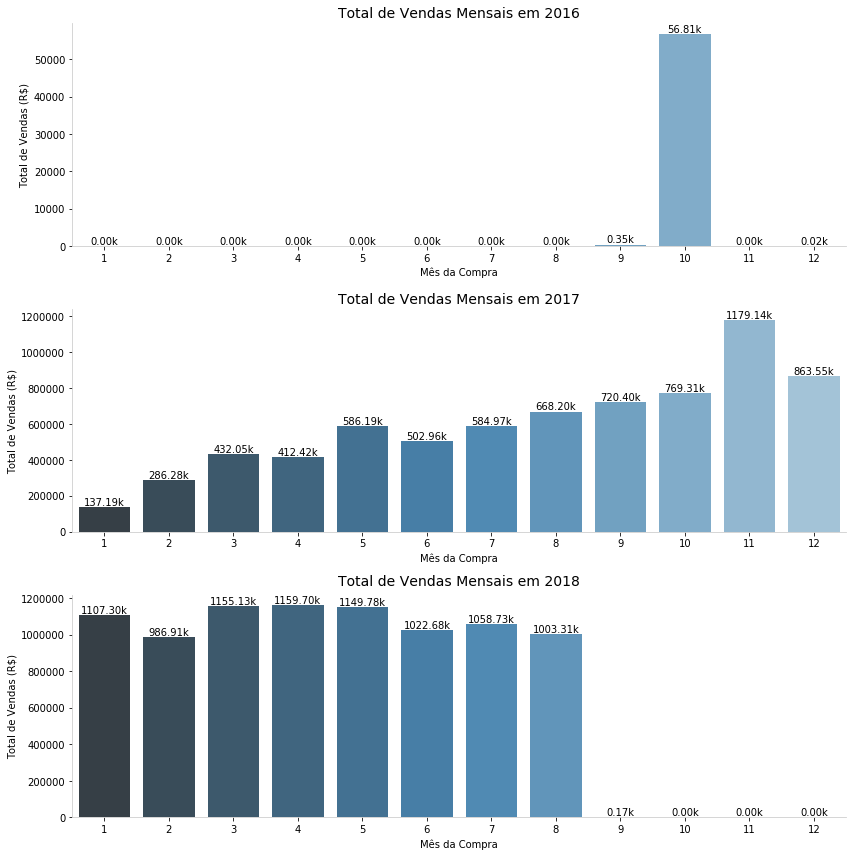

In [22]:
# Quantidade de vendas online por m√™s (neste dataset)
fig, axs = plt.subplots(3, 1, figsize=(12, 12))
bar_plot(x='order_purchase_month', y='total_sales', df=df_sales_2016, ax=axs[0], value=True)
bar_plot(x='order_purchase_month', y='total_sales', df=df_sales_2017, ax=axs[1], value=True)
bar_plot(x='order_purchase_month', y='total_sales', df=df_sales_2018, ax=axs[2], value=True)

# Formatando
axs_list = axs[0], axs[1], axs[2]
for ax in axs_list:
    format_spines(ax, right_border=False)
    ax.set_xlabel('M√™s da Compra')
    ax.set_ylabel('Total de Vendas (R$)')
axs[0].set_title('Total de Vendas Mensais em 2016', size=14)
axs[1].set_title('Total de Vendas Mensais em 2017', size=14)
axs[2].set_title('Total de Vendas Mensais em 2018', size=14, pad=10)
plt.tight_layout()
plt.show()

* **Evolu√ß√£o de Vendas em uma Linha do Tempo**

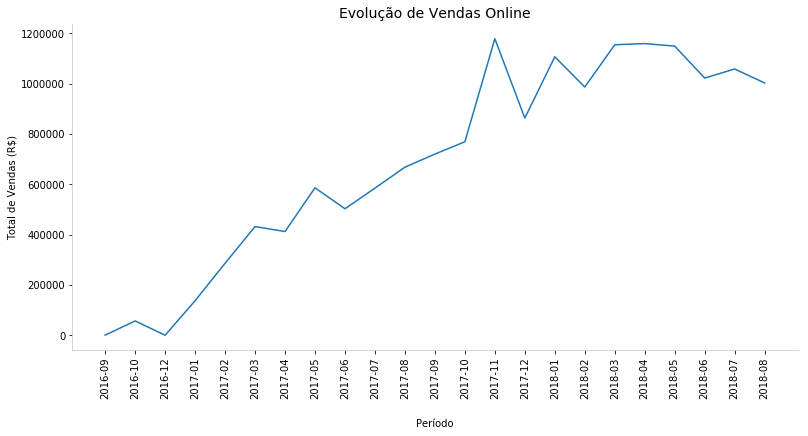

In [23]:
# Transformando coluna m√™s para correta ordena√ß√£o na plotagem
df_sales['order_purchase_month'] = df_sales['order_purchase_month'].astype(str).\
apply(lambda x: '0' + x if len(x) == 1 else x)

# Criando nova coluna com ano-m√™s
df_sales['month_year'] = df_sales['order_purchase_year'].astype(str) + '-' + \
df_sales['order_purchase_month'].astype(str)

# Retornando o tipo primitivo da coluna m√™s
df_sales['order_purchase_month'] = df_sales['order_purchase_month'].astype(int)

# Plotando dados
fig, ax = plt.subplots(figsize=(13, 6))
ax = sns.lineplot(x='month_year', y='total_sales', data=df_sales.iloc[:-1, :])
format_spines(ax, right_border=False)
ax.tick_params(axis='x', labelrotation=90)
ax.set_xlabel('Per√≠odo', labelpad=20)
ax.set_ylabel('Total de Vendas (R$)')
ax.set_title('Evolu√ß√£o de Vendas Online', size=14)
plt.show()

* **Evolu√ß√£o de Vendas nos √öltimos Dois Anos**

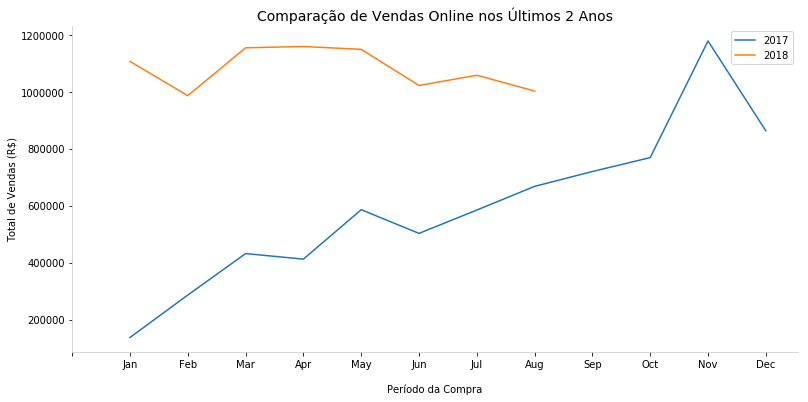

In [24]:
# Cruzando dados de 2017 e 2018
fig, ax = plt.subplots(figsize=(13, 6))
ax = sns.lineplot(x='order_purchase_month', y='total_sales', data=df_sales_2017, label='2017')
ax = sns.lineplot(x='order_purchase_month', y='total_sales', 
                  data=df_sales_2018.iloc[:-4, :], label='2018')
format_spines(ax, right_border=False)
ax.set_xlabel('Per√≠odo da Compra', labelpad=15)
ax.set_ylabel('Total de Vendas (R$)')
ax.set_title('Compara√ß√£o de Vendas Online nos √öltimos 2 Anos', size=14)
plt.xticks(np.arange(13), ['', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 
                           'Oct', 'Nov', 'Dec'])
plt.show()

* **M√©dia de Vendas por Dia da Semana**

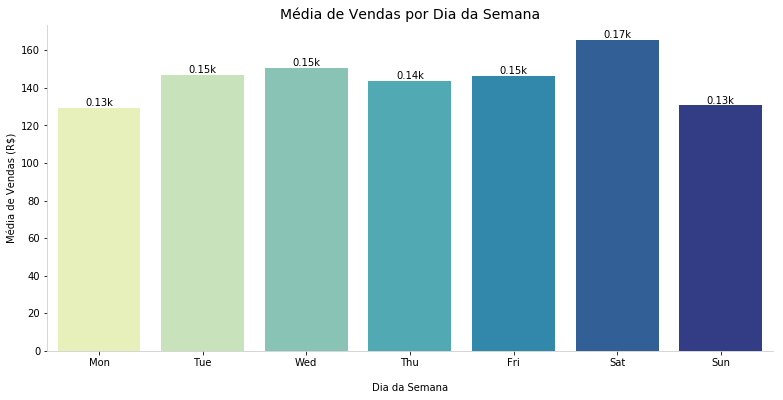

In [25]:
# M√©dia de vendas por dia da semana
df_sales_dow_mean = \
df_orders_items.groupby(['order_purchase_year', 'order_purchase_dayofweek'], 
                        as_index=False).mean().iloc[:, np.c_[0, 1, 6][0]]

# Plotando gr√°fico
fig, ax = plt.subplots(figsize=(13, 6))
bar_plot(x='order_purchase_dayofweek', y='total_sales', ax=ax,
         df=df_sales_dow_mean, colors='YlGnBu', value=True)
ax.set_xlabel('Dia da Semana', labelpad=15)
ax.set_ylabel('M√©dia de Vendas (R$)')
ax.set_title('M√©dia de Vendas por Dia da Semana', size=14)
format_spines(ax, right_border=False)
plt.xticks(np.arange(7), ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.show()

### E-Commerce nos Estados Brasileiros

Ap√≥s entender um pouco mais sobre como o e-commerce no Brasil vem evoluindo e como isso se transmite a partir do conjunto de dados utilizado, ser√° proposta uma an√°lise que leva em considera√ß√£o a atua√ß√£o do com√©rcio online em cada um dos estados brasileiros.

* **Total de Vendas Online por Estado**

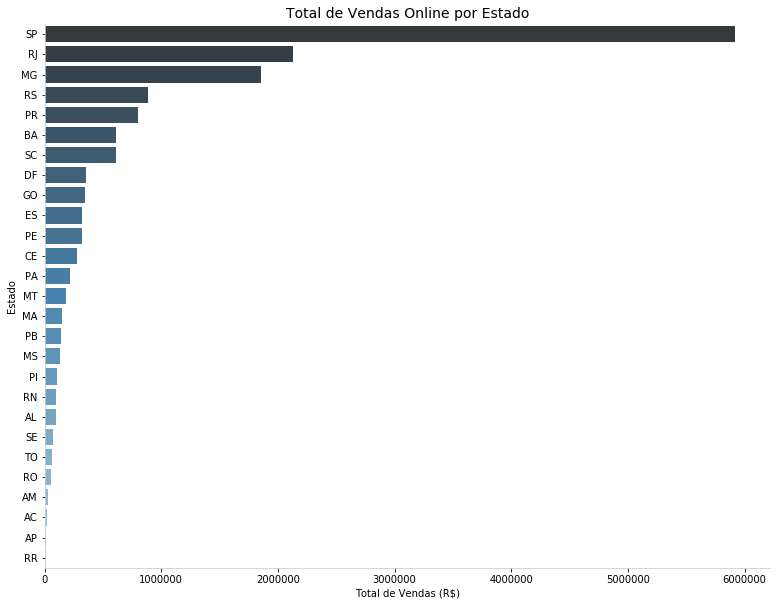

In [26]:
# Unindo dataset de clientes
df_sales_customer = df_orders_items.merge(olist_customer, on='customer_id', how='inner')

# Agrupando total de vendas por estado
df_sales_state = df_sales_customer.groupby(['customer_state'], 
                                          as_index=False).sum().iloc[:, np.c_[(0, -2, -3)][0]]
df_sales_state.sort_values(by='total_sales', ascending=False, inplace=True)

fig, ax = plt.subplots(figsize=(13, 10))
sns.barplot(x='total_sales', y='customer_state', data=df_sales_state, ci=None,
                 palette='Blues_d')
format_spines(ax, right_border=False)
ax.set_title('Total de Vendas Online por Estado', size=14)
ax.set_xlabel('Total de Vendas (R$)')
ax.set_ylabel('Estado')
plt.show()

Para a pr√≥xima plotagem gr√°fica, ser√£o realizados alguns preparativos nos dados com o objetivo de criar uma vis√£o geral sobre os Estados considerando:
* **Valor do frete**
* **Tempo m√©dio de entrega**
* **Diferen√ßa entre data estimativa e data de entrega**

In [27]:
# Calculando dias √∫teis de entrega
df_delivery_time = add_series_working_days(series_name='time_to_delivery', 
                                           df=df_sales_customer,
                                           date_col1 = 'order_purchase_timestamp', 
                                           date_col2 = 'order_delivered_customer_date')

# Agrupando tempo m√©dio de entrega por estado
df_delivery_time = df_delivery_time.groupby(['customer_state'], as_index=False).mean()
df_delivery_time = df_delivery_time.iloc[:, np.c_[(0, -1)][0]]

# Calculando dias √∫teis entre a data de entrega e a data estimada
df_diff_est_deliv = add_series_working_days(series_name='diff_est_deliv', 
                                           df=df_sales_customer,
                                           date_col1 = 'order_delivered_customer_date', 
                                           date_col2 = 'order_estimated_delivery_date')

# Agrupando tempo m√©dio de entrega por estado
df_diff_est_deliv = df_diff_est_deliv.groupby(['customer_state'], as_index=False).mean()
df_diff_est_deliv = df_diff_est_deliv.iloc[:, np.c_[(0, -1)][0]]
df_diff_est_deliv['diff_est_deliv'] = df_diff_est_deliv['diff_est_deliv'].astype(int)

# Calculando par√¢metros informativos
df_mean_freight = df_sales_customer.groupby(['customer_state'], 
                                as_index=False).mean().iloc[:, np.c_[(0, -2, -3)][0]]
mean_freight_value = df_mean_freight['freight_value'].mean()
mean_delivery_time = df_delivery_time['time_to_delivery'].mean()
mean_diff_estimative = df_diff_est_deliv['diff_est_deliv'].mean()

In [28]:
def communicate_params(frete, entrega, estimativa):
    """
    Fun√ß√£o adicional criada para auxiliar na plotagem gr√°fica do dashboard de an√°lise por estado
    
    Input:
        frete: valor do frete a ser plotado no gr√°fico em formato de texto
        entrega: tempo m√©dio de entrega a ser plotado no gr√°fico em formato de texto
        estimativa: diferen√ßa entre estimativa e entrega ser plotada no gr√°fico em formato de texto
    
    Returns:
        None
    """
    # Comunicando o frete
    axs[0, 0].text(0.10, 0.30, f'R${frete:.2f}', fontsize=45)
    axs[0, 0].text(0.20, 0.12, '√© o valor m√©dio de frete', fontsize=12)
    axs[0, 0].text(0.25, 0.00, 'para compras online', fontsize=12)
    axs[0, 0].axis('off')

    # Comunicando tempo m√©dio de entrega
    axs[0, 1].text(0.13, 0.30, f'{entrega:.2f}', fontsize=45)
    axs[0, 1].text(0.66, 0.30, 'dias √∫teis', fontsize=12)
    axs[0, 1].text(0.12, 0.12, '√© o tempo m√©dio de entrega', fontsize=12)
    axs[0, 1].text(0.23, 0.00, 'para compras online', fontsize=12)
    axs[0, 1].axis('off')

    # Comunicando diferen√ßa entre tempo de entrega e tempo estimado
    axs[0, 2].text(0.18, 0.30, f'{estimativa:.2f}', fontsize=45)
    axs[0, 2].text(0.62, 0.30, 'dias √∫teis', fontsize=12)
    axs[0, 2].text(0.17, 0.12, '√© a diferen√ßa entre a data', fontsize=12)
    axs[0, 2].text(0.13, 0.00, 'estimada e a data de entrega', fontsize=12)
    axs[0, 2].axis('off') 

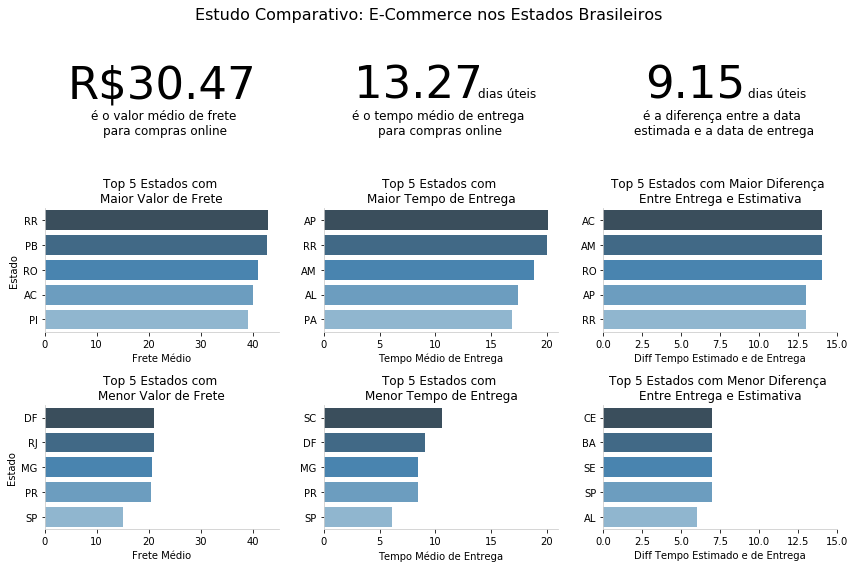

In [29]:
# Plotando
fig, axs = plt.subplots(3, 3, figsize=(12, 8))
communicate_params(mean_freight_value, mean_delivery_time, mean_diff_estimative)

# Plotando informa√ß√µes de frete
plot_param(df=df_mean_freight, col='freight_value', 
           title='Top 5 Estados com \nMaior Valor de Frete', xlim=45, n_row=1, n_col=0, xlabel='Frete M√©dio')

# Plotando informa√ß√µes sobre tempo de entrega
plot_param(df=df_delivery_time, col='time_to_delivery', 
           title='Top 5 Estados com \nMaior Tempo de Entrega', xlim=21, n_row=1, n_col=1, 
           xlabel='Tempo M√©dio de Entrega')

# Plotando informa√ß√µes sobre diferen√ßa entre data de entrega e data estimada
plot_param(df=df_diff_est_deliv, col='diff_est_deliv', 
           title='Top 5 Estados com Maior Diferen√ßa \nEntre Entrega e Estimativa', 
           xlim=15, n_row=1, n_col=2, xlabel='Diff Tempo Estimado e de Entrega')

plt.suptitle('Estudo Comparativo: E-Commerce nos Estados Brasileiros', size=16)
plt.tight_layout()
plt.show()

### Formas de Pagamento Online

Neste t√≥pico, ser√£o estudados as formas de pagamento mais comuns encontrada em transa√ß√µes online.

* **Frequ√™ncia de M√©todos de Pagamento e Evolu√ß√£o ao Longo do Tempo**

In [30]:
# Evolu√ß√£o de meios de pagamento
df_orders_payments = olist_orders.merge(olist_order_payments, on='order_id', how='left')
payments_evolution = df_orders_payments.groupby(by=['order_purchase_year', 'order_purchase_month',
                                                    'payment_type'], as_index=False).count().iloc[:, :4]

payments_evolution = payments_evolution.query('payment_type != "not_defined"')

# Transformando coluna m√™s para correta ordena√ß√£o na plotagem
payments_evolution['order_purchase_month'] = payments_evolution['order_purchase_month'].astype(str).\
apply(lambda x: '0' + x if len(x) == 1 else x)

# Criando nova coluna com ano-m√™s
payments_evolution['month_year'] = payments_evolution['order_purchase_year'].astype(str) + '-' + \
payments_evolution['order_purchase_month'].astype(str)

# Retornando o tipo primitivo da coluna m√™s
payments_evolution['order_purchase_month'] = payments_evolution['order_purchase_month'].astype(int)

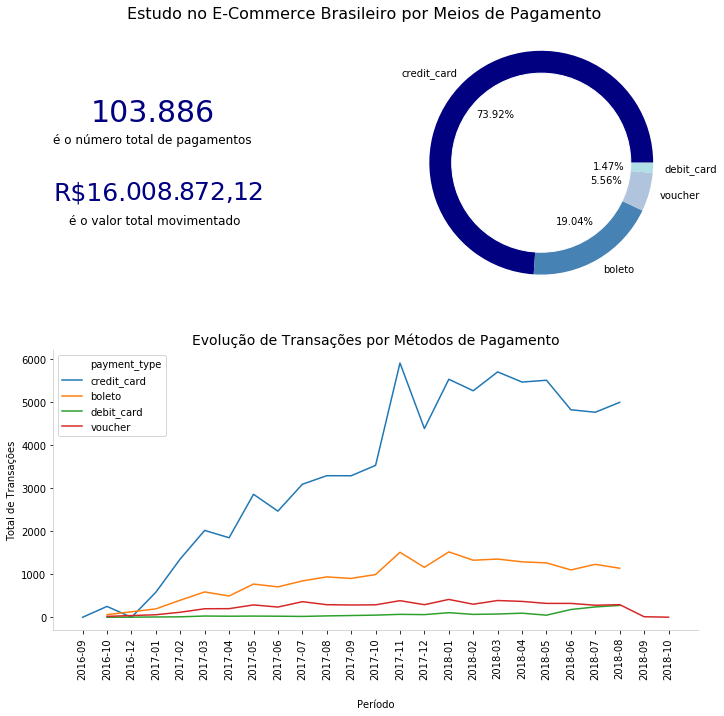

In [31]:
fig = plt.figure(constrained_layout=True, figsize=(10, 10))

# Definindo eixos
gs = GridSpec(2, 2, figure=fig)
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[1, :])

# Plotando receita total
total_transacoes = len(olist_order_payments)
total_pagamentos = olist_order_payments['payment_value'].sum()
ax1.text(0.12, 0.65, f'{str(total_transacoes)[:3]}.', fontsize=30, color='navy')
ax1.text(0.33, 0.65, f'{str(total_transacoes)[3:]}', fontsize=30, color='navy')
ax1.text(0.00, 0.57, '√© o n√∫mero total de pagamentos', fontsize=12)
ax1.text(0.00, 0.37, f'R${str(total_pagamentos)[:2]}.', fontsize=25, color='navy')
ax1.text(0.23, 0.37, f'{str(total_pagamentos)[2:5]}.', fontsize=25, color='navy')
ax1.text(0.40, 0.37, f'{str(total_pagamentos)[5:8]},', fontsize=25, color='navy')
ax1.text(0.57, 0.37, f'{str(total_pagamentos)[9:]}', fontsize=25, color='navy')
ax1.text(0.05, 0.28, '√© o valor total movimentado', fontsize=12)
ax1.axis('off')

# Plotando propor√ß√£o de m√©todos de pagamento
payments_labels = olist_order_payments['payment_type'].value_counts().index
text = f'Total de \nTransa√ß√µes\n\n{total_transacoes}'
colors = ['navy', 'steelblue', 'lightsteelblue', 'powderblue']
donut_plot('payment_type', ax2, olist_order_payments, labels=payments_labels, text='', 
           colors=colors, flag_ruido=1)
#ax.set_title('M√©todos de Pagamentos em Compras Online', size=14)

# Plotando evolu√ß√£o de vendas por m√©todo de pagamento
sns.lineplot(x='month_year', y='order_id', data=payments_evolution, hue='payment_type', ax=ax3)
format_spines(ax3, right_border=False)
ax3.tick_params(axis='x', labelrotation=90)
ax3.set_xlabel('Per√≠odo', labelpad=20)
ax3.set_ylabel('Total de Transa√ß√µes')
ax3.set_title('Evolu√ß√£o de Transa√ß√µes por M√©todos de Pagamento', size=14)

fig.suptitle("Estudo no E-Commerce Brasileiro por Meios de Pagamento", size=16)    

plt.show()

### Categorias de Produtos

In [32]:
# Unindo datasets e preparando demais datasets para plotagem
df_order_products = df_orders_items.merge(olist_products, on='product_id', how='inner')

# Quantidade de vendas
df_qtd_product = df_order_products.groupby(['product_category_name'], 
                                             as_index=False).count()
df_qtd_product = df_qtd_product.loc[:, ['product_category_name', 'total_sales']]

# Receita total
df_sales_product = df_order_products.groupby(['product_category_name'], 
                                             as_index=False).sum()
df_sales_product = df_sales_product.loc[:, ['product_category_name', 'total_sales']]

# Valor m√©dio por categoria
df_mean_product = df_order_products.groupby(['product_category_name'], 
                                             as_index=False).mean()
df_mean_product = df_mean_product.loc[:, ['product_category_name', 'total_sales']]

* **Quantidade de Vendas por Categoria**

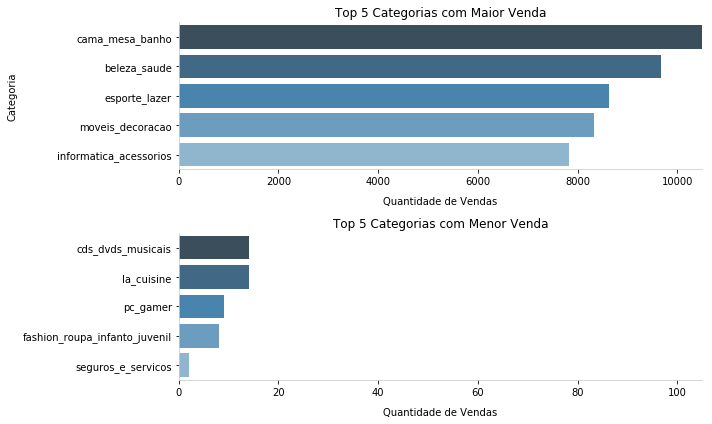

In [33]:
# Quantidade de Vendas
fig, axs = plt.subplots(2, 1, figsize=(10, 6))
plot_param(df=df_qtd_product, col='total_sales', title='Top 5 Categorias com Maior Venda',
           xlim=10500, n_row=0, n_col=0, y='product_category_name', div_xlim=100,
           one_axis=True)
axs[1].set_xlabel('Quantidade de Vendas', labelpad=10)
axs[0].set_xlabel('Quantidade de Vendas', labelpad=10)
axs[0].set_ylabel('Categoria', labelpad=40)
axs[1].set_ylabel('')
plt.tight_layout()
plt.show()

* **Receita Gerada por Categoria**

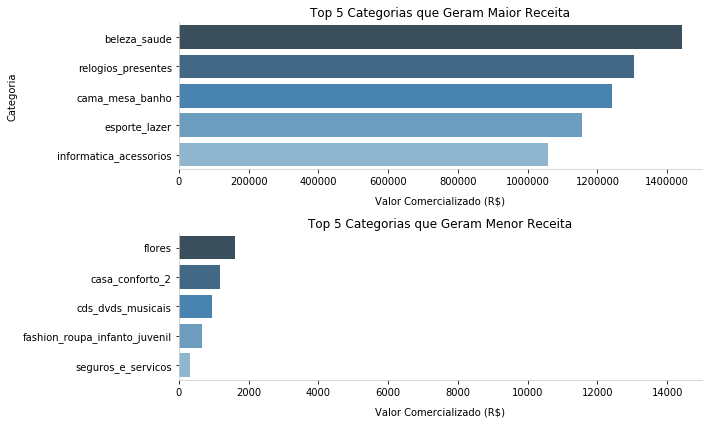

In [34]:
# Valor total de Vendas
fig, axs = plt.subplots(2, 1, figsize=(10, 6))
plot_param(df=df_sales_product, col='total_sales', 
           title='Top 5 Categorias que Geram Maior Receita',
           xlim=1500000, n_row=0, n_col=0, y='product_category_name', div_xlim=100,
           one_axis=True)
axs[1].set_xlabel('Valor Comercializado (R$)', labelpad=10)
axs[0].set_xlabel('Valor Comercializado (R$)', labelpad=10)
axs[0].set_ylabel('Categoria', labelpad=40)
axs[1].set_ylabel('')
plt.tight_layout()
plt.show()

* **Valor M√©dio de Produtos por Categoria**

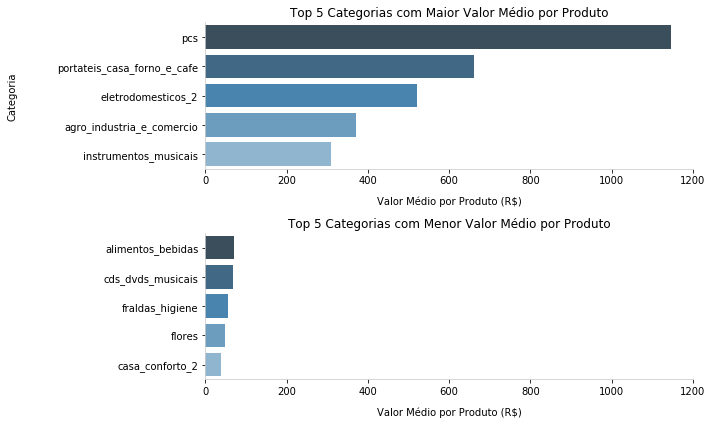

In [35]:
# Valor m√©dio de produto por categoria
fig, axs = plt.subplots(2, 1, figsize=(10, 6))
plot_param(df=df_mean_product, col='total_sales', 
           title='Top 5 Categorias com Maior Valor M√©dio por Produto',
           xlim=1200, n_row=0, n_col=0, y='product_category_name',
           one_axis=True)
axs[1].set_xlabel('Valor M√©dio por Produto (R$)', labelpad=10)
axs[0].set_xlabel('Valor M√©dio por Produto (R$)', labelpad=10)
axs[0].set_ylabel('Categoria', labelpad=40)
axs[1].set_ylabel('')
plt.tight_layout()
plt.show()

### Review Score

* **Distribui√ß√£o de Scores**

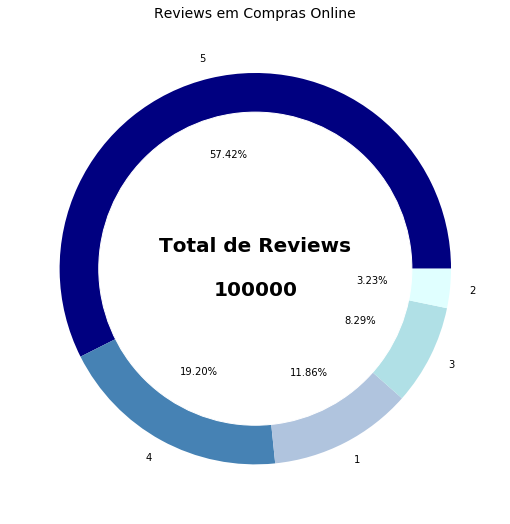

In [36]:
reviews_labels = olist_order_reviews['review_score'].value_counts().index
total_reviews = len(olist_order_reviews)
text = f'Total de Reviews\n\n{total_reviews}'
colors = ['navy', 'steelblue', 'lightsteelblue', 'powderblue', 'lightcyan']
fig, ax = plt.subplots(figsize=(9, 9))
donut_plot('review_score', ax, olist_order_reviews, labels=reviews_labels, text=text, colors=colors)
ax.set_title('Reviews em Compras Online', size=14)

plt.show()

# Processamento de Linguagem Natural

Ap√≥s uma an√°lise explorat√≥ria nos dados, realizada com o objetivo de propor uma familiariza√ß√£o e uma imers√£o no contexto do problema de neg√≥cio a ser resolvido, os pr√≥ximos passos ir√£o contemplar, de fato, a aplica√ß√£o de t√©cnicas de Processamento de Linguagem Natural de acordo com o objetivo proposto.

Entre os conjuntos de dados disponibilizados que descrevem fatos sobre o E-Commerce no Brasil, existem informa√ß√µes a respeito de _reviews_ (ou cr√≠ticas) deixadas por compradores nas plataformas online. O objetivo deste projeto √© analisar este dados e propor um algoritmo de classifica√ß√£o de sentimentos para captar como o consumidor se sente a medida que o fluxo de compras via e-commerce ocorre.

## Contato Inicial com o Dataset

Como citado, abaixo encontra-se um exemplo do dataset a ser utilizado.

In [37]:
# Dados com cr√≠ticas de clientes
olist_order_reviews.head()

review_id                          order_id  \
0  7bc2406110b926393aa56f80a40eba40  73fc7af87114b39712e6da79b0a377eb   
1  80e641a11e56f04c1ad469d5645fdfde  a548910a1c6147796b98fdf73dbeba33   
2  228ce5500dc1d8e020d8d1322874b6f0  f9e4b658b201a9f2ecdecbb34bed034b   
3  e64fb393e7b32834bb789ff8bb30750e  658677c97b385a9be170737859d3511b   
4  f7c4243c7fe1938f181bec41a392bdeb  8e6bfb81e283fa7e4f11123a3fb894f1   

   review_score review_comment_title  \
0             4                  NaN   
1             5                  NaN   
2             5                  NaN   
3             5                  NaN   
4             5                  NaN   

                              review_comment_message review_creation_date  \
0                                                NaN  2018-01-18 00:00:00   
1                                                NaN  2018-03-10 00:00:00   
2                                                NaN  2018-02-17 00:00:00   
3              Recebi bem antes do prazo estipulado.  2017-04-21 00:00:00   
4  Parab√©ns lojas lannister adorei comprar pela I...  2018-03-01 00:00:00   

  review_answer_timestamp  
0     2018-01-18 21:46:59  
1     2018-03-11 03:05:13  
2     2018-02-18 14:36:24  
3     2017-04-21 22:02:06  
4     2018-03-02 10:26:53

In [38]:
# Dimens√µes
print(f'Este dataset possui {olist_order_reviews.shape[0]} linhas e {olist_order_reviews.shape[1]} colunas.')

Este dataset possui 100000 linhas e 7 colunas.


Informa√ß√µes dispon√≠veis:

* **review_id:** chave prim√°ria que identifica a cr√≠tica;
* **order_id:** chave estrangeira para conectar ao dataset de pedidos;
* **review_score:** score dado pelo cliente para cada pedido;
* **review_comment_title:** t√≠tulo do coment√°rio deixado pelo cliente;
* **review_comment_message:** coment√°rio/cr√≠tica deixada pelo cliente;
* **review_creation_date:** data da cria√ß√£o do coment√°rio;
* **review_answer_timestamp:** data da resposta dada

J√° no cabe√ßalho dos dados, √© poss√≠vel visualizar dados nulos. 

In [39]:
# Dados nulos
olist_order_reviews.isnull().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       88285
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

Os dados nulos presentes concentram-se nas colunas de t√≠tulo e de mensagem da cr√≠tica/coment√°rio. √â poss√≠vel que exista uma rela√ß√£o entre ambos, como por exemplo, t√≠tulos n√£o existentes est√£o relacionados a cr√≠ticas n√£o existentes e vice e versa. Para visualizar essa correla√ß√£o entre dados nulos, ser√° utilizada a biblioteca [_missigno_](https://github.com/ResidentMario/missingno).

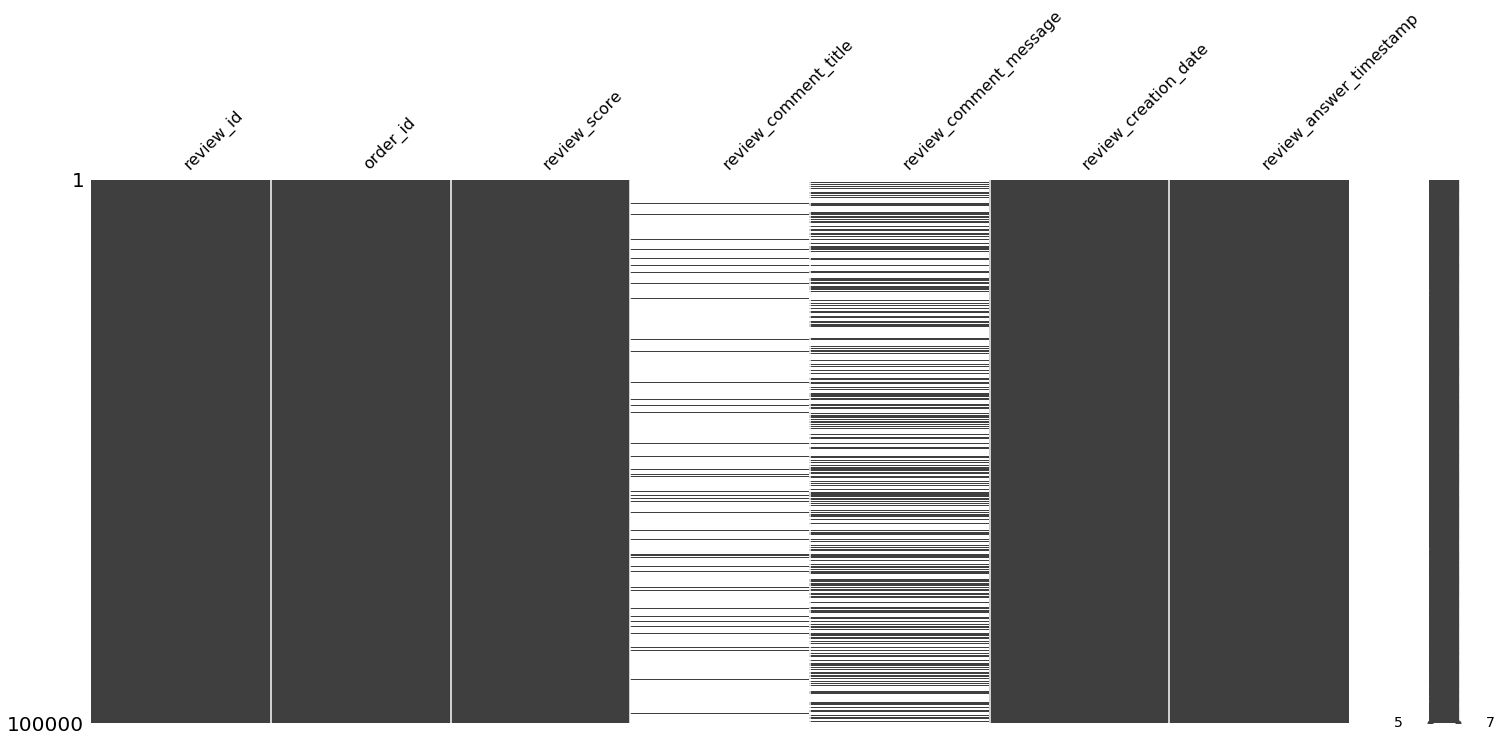

In [40]:
# Correla√ß√£o entre estes dados nulos
msno.matrix(olist_order_reviews)
plt.show()

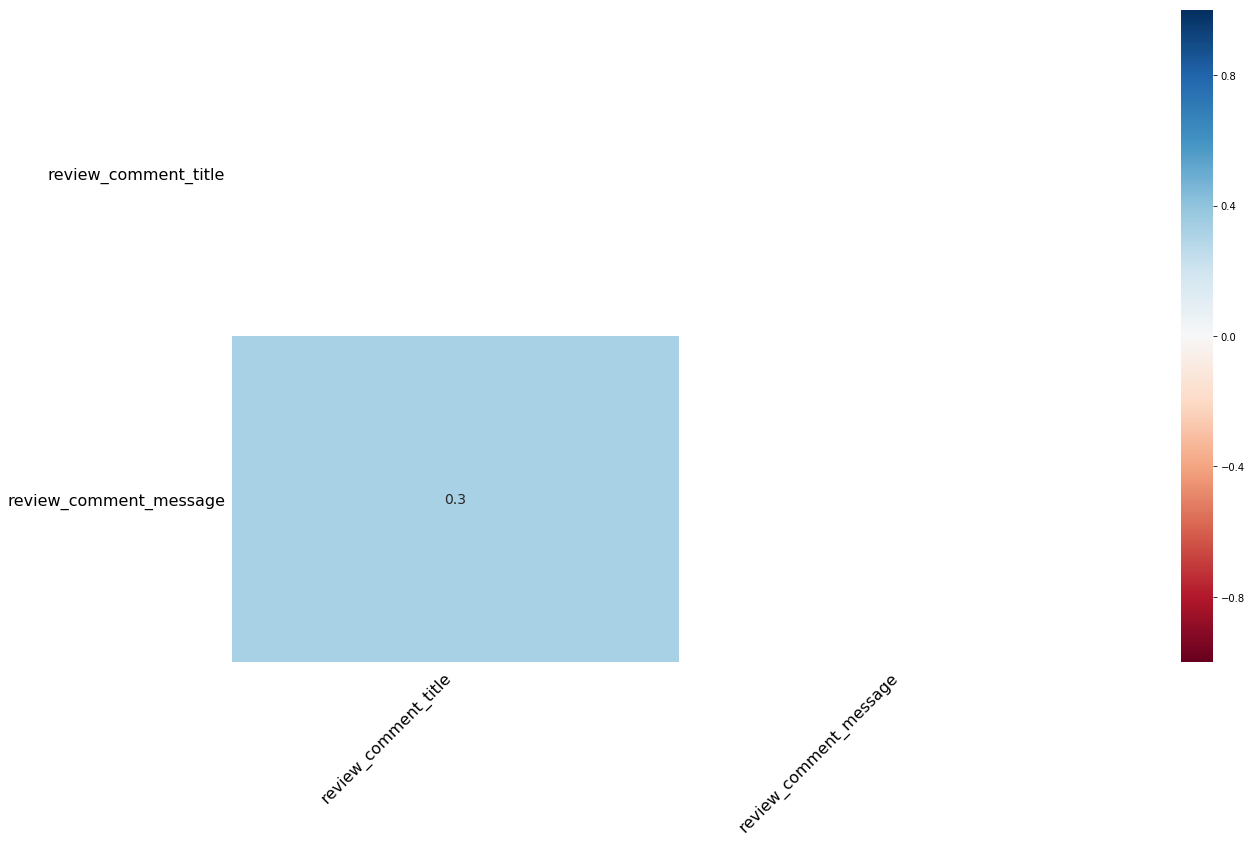

In [41]:
# Correla√ß√£o entre dados nulos
msno.heatmap(olist_order_reviews)
plt.show()

Realmente a plotagem de correla√ß√£o de dados nulos mostra que existe uma rela√ß√£o entre cr√≠ticas nulas com t√≠tulos nulos. Levando em considera√ß√£o os objetivos do projeto, ser√° realizada a remo√ß√£o de dados nulos da coluna *review_comment_message*.

In [42]:
# Removendo dados nulos
reviews = olist_order_reviews.dropna(subset=['review_comment_message'])
print(f'Restaram {reviews.shape[0]} cr√≠ticas a serem analisada.')

Restaram 41753 cr√≠ticas a serem analisada.


In [43]:
# Exemplos
for i in range(5):
    print(f'Cr√≠tica {i+1}: {np.random.choice(reviews["review_comment_message"])}')

Cr√≠tica 1: Adorei o meu produto, vou aproveitar muito.
Cr√≠tica 2: entrega demorada e pouca informa√ß√£o, se o produto for vendido por outro site darei a preferencia
Cr√≠tica 3: Indico este site para meu amigos
Cr√≠tica 4: Entregou no prazo.
Cr√≠tica 5: Produto muito bom


Depois de analisar brevemente o conte√∫do a ser trabalhado, √© poss√≠vel dar os primeiros passos para a constru√ß√£o de um modelo de an√°lise de sentimentos. A seguir, ser√° proposta uma an√°lise utilizamos Express√µes Regulares a fim de identificar se existem alguns elementos de HTML nas cr√≠ticas fornecidas pelo dataset.

## RegEx

Pelo fato de se trabalhar com um conte√∫do oriundo da internet, √© poss√≠vel que algumas tags HTML, ou mesmo tags de quebra de linha e outros padr√µes, estejam presentes nos coment√°rios deste dataset. Em um primeiro momento, deve ser feita uma investiga√ß√£o pra confirmar essa hip√≥tese a partir de algumas funcionalidades trazidas pelas Express√µes Regulares.

In [44]:
# Verificando um exemplo de coment√°rio
critica = reviews.iloc[3, 4]
critica

'Mas um pouco ,travando...pelo valor ta Boa.\r\n'

Aqui √© poss√≠vel visualizar as tags \r (_carriage return_ c√≥digo ASCII 10) e \n (_new line_ c√≥digo ASCII 13). Atrav√©s de RegEx, √© poss√≠vel procurar este padr√£o dentro do texto.

In [45]:
# Aplicando express√£o
p = re.compile(r'\n')
s = p.search(critica)
print(s)

<re.Match object; span=(44, 45), match='\n'>


O resultado acima mostra que o padr√£o "\n" foi encontrado nas posi√ß√µes indicadas por `span=(44, 45)`. Ser√° mesmo?

In [46]:
# Confirmando
critica[44]

'\n'

Entretando, podem existir coment√°rios com mais de uma quebra de linha ou outra express√£o caracter√≠stica. Exemplo:

In [47]:
# Coment√°rio com mais de uma tag
critica2 = reviews.iloc[48, 4]
critica2

'Estava faltando apenas um produto, eu recebi hoje , muito obrigada!\r\nTudo certo!\r\n\r\nAtt \r\n\r\nElenice.'

Em casos como este, rodar o _search_ da express√£o regular criada ir√° retornar apenas a primeira apari√ß√£o da express√£o procurada.

In [48]:
# Testando
s = p.search(critica2)
print(s)

<re.Match object; span=(68, 69), match='\n'>


Para retornar todas as poss√≠veis posi√ß√µes da express√£o procurada, √© preciso utilizar o m√©todo `finditer()`.

In [49]:
# Retornando todos os resultados
iterator = p.finditer(critica2)
for match in iterator:
    print(match.span())

(68, 69)
(81, 82)
(83, 84)
(89, 90)
(91, 92)


In [50]:
# Testando para todos os coment√°rios
p = re.compile(r'\n')
criticas = list(reviews['review_comment_message'].values)
positions_dict = {}
i = -1
for c in criticas:
    i += 1
    match_list = []
    iterator = p.finditer(c)
    for match in iterator:
        match_list.append(match.span())
    control_key = f'Cr√≠tica {i}'
    if len(match_list) == 0:
        pass
    else:
        positions_dict[control_key] = match_list

# Verificando
for k, v in positions_dict.items():
    print(k, v)
    if k[-2:] == '30':
        break

Cr√≠tica 3 [(44, 45)]
Cr√≠tica 9 [(35, 36), (86, 87), (138, 139)]
Cr√≠tica 22 [(46, 47)]
Cr√≠tica 25 [(71, 72), (90, 91)]
Cr√≠tica 30 [(67, 68)]


In [51]:
# Procurando sites
for c in criticas:
    for f in re.finditer(r'http://', c):
        print(f.group())

http://
http://


In [52]:
# Retornando urls
for c in criticas:
    urls = re.findall('https?://(?:[-\w.]|(?:%[\da-fA-F]{2}))+', c)
    if len(urls) == 0:
        pass
    else:
        print(f'Cr√≠tica: {criticas.index(c)} - Links: {urls}')

Cr√≠tica: 10796 - Links: ['http://prntscr.com', 'http://prntscr.com']
Cr√≠tica: 12782 - Links: ['https://www.lannister.com.br']


√â poss√≠vel afirmar que existem coment√°rios (apesar de poucos) com alguns links. Provando:

In [53]:
# Primeiro teste
criticas[10796]

'comprei o produto pela cor ilustrada pelo site da loja americana, no site mostra ser preto http://prntscr.com/jkx7hr quando o produto chegou aqui veio todos com a mesma cor, tabaco http://prntscr.com/'

In [54]:
# Segundo teste
criticas[12782]

'Pedi esse: https://www.lannister.com.br/produto/22880118/botox-capilar-selafix-argan-premium-doux-clair-2x1-litro?pfm_carac=doux%20clair&pfm_index=3&pfm_page=search&pfm_pos=grid&pfm_type=search_page%'

Apesar da Express√£o Regular ter identificado os sites, ela n√£o pegou o link completo, mas sim apenas a parte principal. Abaixo, ser√° colocada uma nova express√£o para coletar o link completo, conforme visto nos exemplos acima.

In [55]:
# Testando outro m√©todo
urls = re.findall('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\), ]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', 
                  criticas[12782])
if len(urls) == 0:
    pass
else:
    print(f'Cr√≠tica 12782:\nLink: {urls}')

Cr√≠tica 12782:
Link: ['https://www.lannister.com.br/produto/22880118/botox-capilar-selafix-argan-premium-doux-clair-2x1-litro?pfm_carac=doux%20clair&pfm_index=3&pfm_page=search&pfm_pos=grid&pfm_type=search_page%']


## Stop Words

Nesta etapa do projeto, ser√£o removidas as stopwords atrav√©s da biblioteca `nltk`, al√©m das pontua√ß√µes presentes em cada cr√≠tica/coment√°rio. Antes, ser√° mostrado um exemplo de coment√°rio antes e ap√≥s a aplica√ß√£o da fun√ß√£o criada para realizar este procedimento.

In [56]:
# Exemplo
criticas[462]

'Fornecedor targaryen me mandou um massageador completamente diferente do que comprei, de pre√ßo inferior e cheio de avalia√ß√µes negativas. Ningu√©m erra mandando um superior n√©, curioso..Ou seja, n recomendo'

In [57]:
# Testando
c = criticas[462]
text_process(c)

['fornecedor',
 'targaryen',
 'mandou',
 'massageador',
 'completamente',
 'diferente',
 'comprei',
 'pre√ßo',
 'inferior',
 'cheio',
 'avalia√ß√µes',
 'negativas',
 'ningu√©m',
 'erra',
 'mandando',
 'superior',
 'n√©',
 'curiosoou',
 'n',
 'recomendo']

Realmente a fun√ß√£o removeu as pontua√ß√µes e splitou as palavras, retornando uma lista

In [58]:
# Aplicando transforma√ß√µes ao dataset
processed_reviews = reviews.copy()
processed_reviews['reviews_processed'] = processed_reviews['review_comment_message'].apply(text_process)
processed_reviews['reviews_processed'].head()

3               [recebi, bem, antes, prazo, estipulado]
4     [parab√©ns, lojas, lannister, adorei, comprar, ...
9     [aparelho, eficiente, site, marca, aparelho, i...
12                [pouco, travandopelo, valor, ta, boa]
15    [vendedor, confi√°vel, produto, ok, entrega, an...
Name: reviews_processed, dtype: object

<b>Output dos datasets

In [74]:
frase =''
texto = ''
f= open("dataset_train.txt","w+")
for i in range(0,int(processed_reviews.shape[0]*0.8)):
    linha = processed_reviews['reviews_processed'].iloc[i]
    for word in linha:
        frase = frase + ' ' +word 
    if int(processed_reviews['review_score'].iloc[i])>3:
        f.write(frase + ' &&- 1 \n')
    else:
        f.write(frase + ' &&- 0 \n')
    frase = ''
f.close() 

In [71]:
frase =''
texto = ''
f= open("dataset_test.txt","w+")
for i in range(int(processed_reviews.shape[0]*0.8)+1,processed_reviews.shape[0]):
    linha = processed_reviews['reviews_processed'].iloc[i]
    for word in linha:
        frase = frase + ' ' +word 
    if int(processed_reviews['review_score'].iloc[i])>3:
        f.write(frase + ' \t 1 \n')
    else:
        f.write(frase + ' \t 0 \n')
    frase = ''
f.close() 

# Naive Bayes classifier

In [3]:
import sys
import re
import math
regex = r"[-'a-zA-Z√Ä-√ñ√ò-√∂√∏-√ø]+" 

In [72]:
class NBClassifier:

    def __init__(self, training_file=None):
        self.Data          = []
        self.Classes       = dict([])
        self.V             = set([])
        self.bigdoc        = dict([])

        self.logprior      = dict([])
        self.loglikelihood = dict([])

        if training_file is not None:
            self.load_data('dataset_train.txt')


    def load_data(self, training_file):
        training_document = open(training_file,'r')

        for line in training_document.readlines():
            d, c = tuple(line.strip().split("&&-"))
            self.Data.append((c,d))

            if c not in self.Classes:
                self.Classes[c] = 0
                self.bigdoc[c] = []
            self.Classes[c] += 1
            
            for w in re.findall(regex, d):
                self.V.add(w)
                self.bigdoc[c].append(w)
        print(self)
        print("Total: classes={} documentos={} vocabulario={}".format(len(self.Classes), len(self.Data), len(self.V) ) )


    def train(self):
        for c in self.Classes:
            Ndoc = len(self.Data)
            Nc   = self.Classes[c]

            self.logprior[c] = math.log(Nc/Ndoc)
            #self.logprior[c]  = Nc/Ndoc

            count_wc = 0
            for w in self.V:
                count_wc += self.bigdoc[c].count(w)

            for w in self.V:
                self.loglikelihood[(w,c)] = math.log( (self.bigdoc[c].count(w) + 1) / (count_wc + len(self.V) )  )
                #self.loglikelihood[(w,c)]  = (self.bigdoc[c].count(w) + 1) / (count_wc + len(self.V) )  

        print("\n", self.logprior)


    def test(self, testdoc):
        s = dict([])
        for c in self.Classes.keys():
            s[c] = self.logprior[c]
            for w in re.findall(regex, testdoc):
                if w in self.V:
                    s[c] += self.loglikelihood[(w,c)]
                    #s[c]  *= self.loglikelihood[(w,c)]

        return max(s, key=s.get)


In [ ]:
if __name__ == '__main__':
    fileName = sys.argv[1]

    NBC = NBClassifier(fileName)
    NBC.train()

    while True:
        phrase = input("\nDigite uma frase: ")
        print("Resposta: {}".format( NBC.test(phrase)) )

<b>Test em cima de base real

In [143]:
df_resposta=pd.DataFrame(columns=['texto','resposta_pred','resposta_real'])

In [146]:
if __name__ == '__main__':
    for i in range(int(processed_reviews.shape[0]*0.8)+1,processed_reviews.shape[0]):
        linha = processed_reviews['reviews_processed'].iloc[i]
        for word in linha:
            frase = frase + ' ' +word 
        if int(processed_reviews['review_score'].iloc[i])>3:
            resp = 1
        else:
            resp = 0     
        df_resposta=df_resposta.append({'texto':frase,'resposta_pred':int(NBC.test(frase)),'resposta_real':int(resp)}, ignore_index=True)   
        frase = ''

 produto bom chego rapido
 1
1
 demora avisar deu problema entrega recebi produto avisaram quase dia receberfoi descontado primeira parcela referente compra
 0
0
 demorado
 0
0
 nao chegou problemas correios
 0
0
 bom dia queria entender qu√™ colocam qu√™ entregue resid√™nciaqu√™ entregue n√° ag√™ncia correios pr√≥ximasendoqu√™o frete incluso compra
 0
1
 pre√ßo loja √≥timo por√©m op√ß√µes afia√ß√£o maiores acompanha parafusos buchas
 1
1
 produto chegou bem embalado entrega r√°pida
 1
1
 amei colcha
 1
1
 tudo ok
 1
1
 tudo ok
 1
1
 gostei veio bem antes prazo previsto
 1
1
 recomendo compra feita nessa loja ter total respeito responsabilidade clientes
 1
1
 sempre compro lannister
 1
1
 produto chegou antes dia previsto bom √≥tima qualidade tudo certinho recomendo
 1
1
 excelente
 1
1
 produto recebido ainda montei avalia√ß√£o visual chegou tudo correto
 1
1
 bem atendido pouco demorado chegar mercadoria
 1
0
 boa experi√™ncia
 1
1
 produto √≥tima decora√ß√£o deixar ambiente lindo
 1

 ja problemas lannister 2 vez produto nao entregue estornaram cartao quero saber vai ficar
 0
0
 demos rel√≥gio presente neta gostou
 1
1
 embora prazo 14 dias √∫teis produto comprado dia 0905 veio chegar dia 26 alem chegar super atrasado ainda veio produto errado
 0
0
 produto fr√°gil veio lascado acabou quebrar primeira tentativa uso
 0
0
 tudo funcionando percebi alguns arranh√µes corpo m√°quina nada influencie uso valor fiquei frustrado loja
 0
0
 produto chegou bem antes prazo previsto ainda instalei exatamente descrito
 1
1
 avaliar recomendar loja sendo ainda recebi produto
 0
0
 √≥tima compra chegou bem antes prazo ainda usei fiquei hiper feliz recomendo üëèüëèüëèüëèüëè
 1
0
 produto entregue somente metadecomprei dois rolos papel parede entregue somente rolo
 0
0
 lumin√°ria linda
 1
1
 empresa cumpriu prazo entrega produto bem embalado
 1
0
 efetuei compra 3 pendentes ocorre recebi pedido incompleto 3 pendentes recebi apenas 2 enviei 2 emails lannister agora obtive nenhu

 vendedor cumpriu an√∫ncio √≥culos atende esperado
 1
1
 excelente servi√ßo prestado
 1
1
 produto p√©ssima qualidade
 0
0
 loja superou expectativas entregou produto primeiros dias antes final prazo r√°pido eficiente
 1
1
 comprei adaptar aspirador p√≥ veicular 12v tomada el√©trica 110v aspirador funciona
 0
0
 entrega correta
 1
1
 produto veio certo produto veio pintura desgastada v√°rios lugares
 0
0
 achei descri√ß√£o produto ilus√≥ria dizendo cobre leito percal etc parece len√ßol t√£o fininho gostei recebi fiquei decepcionada
 0
0
 entregue dentro prazo
 1
1
 colocar l√¢mpada quebrou parafuso dai colei
 0
0
 cuba veio quebrada efetuo barroca
 0
0
 entrega r√°pida produto perfeito
 1
1
 fiquei feliz compra atendimento entrega q bem antes previsto tanto q dia incentivei m√£e tbm comprar vcs parab√©ns ganharam fi√©is clientes
 1
1
 top
 1
1
 compromisso respeito clientes
 1
1
 encomenda veio errada pedi coisa veio outra totalmente diferente comprei blecaute tapa sol veio cortina pla

 pel√≠cula ficou bem menor tela celular
 1
0
 sei vi produto chegou pareceu novo manualenfim hora compra verifiquei pq sempre compro nessa loja coisa nova sabia q vendiam coisas usadas
 0
0
 m√™s fiz compra pagando coisa nao absurdo
 0
0
 produto chegou bastante antescedencia fiquei feliz obrigada
 1
1
 produto chegou prazo defeito pedindo troca reembolso
 0
0
 produto chegou bem embalado antes prazo gostei vendedor
 1
1
 comprei duas pe√ßas recebi tudo bem empresas diferentes acho complicado pois pe√ßas finalizar enxoval noiva
 0
0
 produto √≥tima qualidade entretanto site tal produto parecia ser peludo contudo loja produtos recomendados
 1
1
 muita demora
 0
0
 negativo
 1
0
 aguardando entrega
 0
0
 ate agora comprei transformador voltagem 9000 btu nao recebi liguei pra americana atendente falou q ia liga pra transportadora mr retorno dois dias ja passaram prazo
 0
0
 quero resposta apenas
 0
0
 nao recebi produto ainda
 0
0
 comprei walk talk recebi baba eletr√¥nica consigo contato

 fornecedor respons√°velproduto bem embalado entrega r√°pida faz jus boa recomenda√ß√£o
 1
1
 tudo recebido perfeitamente
 1
1
 √≥timo
 1
1
 produto original an√∫ncio quero devolver produto estorno pagamento
 0
0
 cumpre oque promete
 1
1
 zero responsabilidade
 0
0
 frequ√™ncia produto incompat√≠vel rede el√©trica brasileira mostrado descri√ß√£o produto antes ser comprado
 0
0
 amei comprar lojas lannister f√°cil comprar aplicativo pode acompanhar rastreamento espero comprar vezes
 1
1
 comprei recebi nenhuma not√≠cia momento
 0
0
 atendeu super bem todas expectativas bem afiadas veio estojo preto bem organizado bonito
 1
1
 produto chegou quebrado consigo realizar troca site
 0
0
 veio certinho prazo
 1
1
 gostei agilidade entrega qualidade produto
 1
1
 demorou demais entrega produto nao refor√ßado bonito
 1
0
 nao comprei picadinho p chegar casa picadinho cada dia coisa nao empregada nao quero comprar voces nunca chato
 0
1
 chegou antes esperado
 1
1
 material fragilachei produto 

 recebi smartphone faltando componentes caixa lente camera traseira arranhada parece produto usado ap√≥s trinta dias espera produto vem p√©ssimas condi√ß√µes
 0
0
 chegou simplesmente 8 dias parab√©ns
 1
1

 1
1
 gostei compra descri√ß√£o produto quanto material verdadeira burocracia troca prefiri ficar
 0
0
 √≥tima compra recebi dentro prazo mercadoria pedido recomendo vendedor
 1
1
 gostei
 1
1
 produto chegou tempo previsto google
 1
1
 produto funciona veio errado
 0
0
 produto √≥timo entrega deixou desejar
 1
0
 chegou bem antes prazomuito antes
 1
1
 produto entregue antes prazo gostei t√°bua carne fiquei chateada q bandeja baixo material bom veio pouquinho amassada bom produto
 1
1
 tempo entrega agora recebi produto
 0
0
 produto atendeu espectativas qualidade descrito
 1
1
 entrega super r√°pida
 1
1
 produto entregue prazo fiz v√°rias reclama√ß√µes inclusive reclama aki assim veio faltando dois produtos recebi ativador cachos falaram ainda entregaria semana vou aguarda
 0
0
 

 produto √≥timo entrega rapida
 1
1
 otimo vendedor
 1
1
 produto chegou antes prazo satisfeito parabens
 1
1
 chegou antes prazo ainda testei aparenta estar tudo ok
 1
1
 produto √≥timo entrega super r√°pida
 1
1
 buscar correios bom produto
 1
1
 entregue antes prazo produto qualidade
 1
1
 produto lindo bom √≥tima qualidade
 1
1
 recebi cortador salada inv√©s gaiolas
 0
0
 rel√≥gio menor esperava desperta alto jeitinho precisava consigo acordar chegou antes prazo 1 m√™s demorou uns 10 dias chegar
 1
1
 √≥timo
 1
1
 rel√≥gio lindo entregue antes prazo valeu pena
 1
1
 excelente produto vou comprar
 1
1
 mercadoria passou prazo entrega
 0
0

 1
0
 produto qualidade pre√ßo interessante recomendo
 1
1
 tesoura deve estar sendo fabricada agora pq previs√£o entrega 153 prazo longo comparado co outro produto adquirido dia hj 193 nada
 0
0
 lindo por√©m toalhas finas
 0
1
 adorei recebi antes prazo
 1
1
 dou 5 estrelas porque ainda recebi outro produto q comprei
 0
0
 chegou antes prazo per

 atraso entrega feedback cliente espero nunca precisar comprar algo nesta loja recomendaria nunca loja medo receber produto indignado
 0
0
 gostei to satisfeito loja produto
 1
1
 produto chegou nenhum problema funcionando normalmente dificuldade pro computador reconhecer precisa instalar nenhum drive
 0
1
 produto entregue mal embalado descri√ß√£o fr√°gil copos chegaram todos quebrados cacos tentando resolu√ß√£o site telefone baratheon resposta
 0
0
 bom chegou antes prometido
 1
1
 produto p√©ssima qualidadecai todo fiapo pincel tin√£o recomendo
 0
0
 satisfeito melhor sistema entrega foce correios todos produtos cargo correios causa transtorno ser empresa inconfi√°vel torna insatisfa√ß√£o
 0
1
 produto maravilhoso entrega super r√°pida
 1
1
 boa entrega recomendo
 1
1
 produto nunca apareceu casa
 0
0
 produto lindissimo adorei
 1
1
 infelizmente embalagem produto chegou violada aguardando reembolso envio restante produto adquirido
 0
0
 chegou direitinho nada quebrado embalagem ade

 tudo ok
 1
1
 produto atende necessidade por√©m conserva√ß√£o ddeixa desejar
 1
0
 recebi produto dentro prazo produto excelente recomendo todos pr√°tico atende bem necessidades uso dom√©stico
 1
1
 surpreendeu porque recebi produto antecipa√ß√£o dez dias prazo dado entrega agradecer toda equipe obrigado deus aben√ßoe
 1
1
 fiquei triste decepcionado trabalho
 0
0
 gostei produto
 1
1
 entrega r√°pida antes prazo previsto produto correto parece boa qualidade procuramos hoje falta tempo cuidar coisas casa pretendo comprar colchas
 1
1
 quero produto dinheiro volta
 0
0
 produto chegou demorou
 1
0
 seguro r√°pido √°gil
 1
1
 recomendo
 1
1
 demorada agora recebi produto
 0
0
 entrega r√°pida
 1
1
 excelente
 1
1
 produtos firenze cosm√©ticos excelentes
 1
1
 entrega r√°pida produto esperado
 1
1
 deu dois dias pelicula solto qualidade ruim
 0
0
 √≥tima trabalho
 1
1
 livros bons
 1
1
 recebi pedido tempo estimado informada porque atraso
 0
0
 produto entregue r√°pido satisfeito
 1
1
 g

 encomenda chegou bem antes prazo certeza comprarei denovo
 1
1
 td ok
 1
1
 produto original entregue prazo certo
 1
1
 produto qualidade chegou antes prazo previsto gostei
 1
1
 produto entregue antes prazo determinado
 1
1
 produtos bem embalados corretos entrega dentro prazo
 1
1
 produto qualidade entregue aves prazo
 1
1
 baratheon produtos lindos √≥tima qualidadeparab√©ns sempre
 1
1
 produto chego antes prazo entrega revomendo
 1
1
 recomendo
 1
1
 ok
 1
1
 entrega prazo bom material
 1
1
 sempre comprei lannister otima loja otimos pre√ßos parab√©ns
 1
1
 entrega r√°pida
 1
1
 comprei capacete branco veio azul
 0
0
 produto bom chegou antes prazo super recomendo atendeu expectativas
 1
1
 entrega prazo combinado por√©m pedi duas unidades entregaram
 0
1
 produto material resistente porem marca tamanho g achei pequena larga carrinho colocar garrafinha √°gua bolsos laterais acredito arraste
 0
1
 recomendo todos bom
 1
1
 maravilhosotudo queria entrega dia seguinte confirma√ß√£o 

 atraso entrega dever correios d√° loja renda deveria ser firme tecido valeu
 0
1
 produto demorou pouco chegar sei direito funciona log√≠stica entrega agora tudo bem
 1
1
 coment√°rios
 1
0
 achando demorado entrega ficaram entregar dia 020218 hoje chegou
 0
1
 lindas assadeiras √≥tima qualidade recomendo todos
 1
1
 realizada compra por√©m verificar detalhamento encomenda produto estoque
 0
0
 servi√ßo √≥timo demora correio
 1
1
 tudo certo bunito
 1
1
 nao recebi produto
 0
0
 produto entregue atraso esperado produto qualidade
 1
1
 √≥timo produto
 1
1
 produto entregue incompleto comprei 2 entregue 1
 0
0
 bom cumprimento prazo deveriam avisar produto viria dois envelopes datas diferentes entrar contato email logo informado
 0
1
 recebido
 1
0
 muita demora atender solicita√ß√µes demora envio
 0
0
 entrega feita antes prazo
 1
1
 comprei pensando q igual foto chegou totalmente diferente
 0
0
 k
 1
1
 chegou antes previsto tudo certo
 1
1
 desde solucionem problema recomendaria pq c

 tudo ok
 1
1
 boa entregaapesar rastreio falho
 0
1
 tudo perfeito
 1
1
 fone original lg veio faltando componentes avaliei estrela porque sistema aceita zerar
 0
0
 fiz boa compra entregue antes prazo
 1
1
 fiz pedido duas lumimarias recebi
 0
0
 pedido cancelado falta estoque recebi produto cobran√ßa ainda fatura estorno quero solu√ß√£o
 0
0
 informa√ß√µes claras prasos dentro esperado
 1
1
 frete deveria ser inferior ai produto
 0
1
 perfeito
 1
1
 enganado stark agora querem pague algo entregue golpistas aqui faz aqui paga dia v√£o pagar maldade
 0
0
 gostei recomendo pra todos quiser comprar confian√ßa cumpre promete
 1
1
 perfeito cores vivas simplismente ameei
 1
1
 bolsa linda espa√ßosa show bola adorei
 1
1
 entrega antes prazo
 1
0
 entregue prazo tudo certinho nota 10
 1
1
 sempre compro recomendo √≥tima
 1
1
 endere√ßo correto porteiro 24h entregaram produto
 1
0
 presente momento n entregue verdade nota fiscal entreguecancelei pedido
 0
0
 fonte veio diferente anunciado
 

 fiz 3 compras nesse dia parceiros diferentes por√©m restante chegou
 0
0
 bom
 1
1
 produto bem embalado chego bem antes prazo
 1
1
 tanto loja quanto vendedor lixeira bom recomendo tudoentrega super r√°pido chegou antes prazoamei tudo
 1
1
 mercadoria entregue lament√°vel
 0
0
 demorou pouco pra chegar embalagem prec√°ria produto ainda testei correto
 1
1
 veio certinho demorou latinha veio pouco amassadinha gostei pigmenta√ß√£o tinta
 1
1
 prazo entrega 9 dias chegou 2o
 1
1
 pedindo cancelamento mesma hora compra insistiram entregar neguei recebimento correio devolvi
 0
0
 recebi produto antes prazo
 1
1
 adorei
 1
1
 ruim demora entrega transportadora valor r√°pido entrega
 0
0
 boa tarde recebi outras duas calculadoras dois dias tudo ok obrigado
 1
1
 recomendo todos produto bom entrega r√°pida
 1
1
 tudo imaginei tudo correto
 1
1
 excelente
 1
1
 gostaria enviassem novo produto porque roubado queria ficar
 0
1
 parab√©ns satisfeita
 1
1
 compra nao chegou
 0
0
 produto atendeu 

 princ√≠pio fiquei preocupado longo prazo entrega dias √∫teis por√©m chegou pouco antes
 1
1
 gostei pruduro emtrega dentro prazo
 1
1
 produto entregue antes prazo
 1
1
 produto entregue compreie ainda veio defeito parte lateral direita veio aberta volume sobe sozinho segurar controle conseguindo reimbo
 0
0
 produto top
 1
1
 chegou antes previstoparabens respons√°veis log√≠stica entrega
 1
1
 entregue muita rapidez fiquei satisfeita
 1
1
 bom
 1
1
 produto qualidade achei cor azul verde fiquei satisfeita produto obrigada
 1
1
 comprei 5 lustre pendente enviaram 3
 0
0
 produto recebi diferente produto anunciado
 0
0
 nota 10
 1
1
 comprei dois cartuchos tinta preta xl dia 0902 pq precisando recebi dia 1003 apenas cartucho nota fiscal veio 02 cartuchos faturados quero ver vai ac
 0
0
 infelizmente demorou pouco chegar
 0
0
 controle bom demora entrega poderiam entregar menos dias dentro prazo
 1
1
 produto nao chegou nao recebi informacao suficiente sobre andamento entrega
 0
0
 bom


 gostei compra
 1
0
 denis
 1
1
 rodo m√°gico bom centrifuga seca esfreg√£o conforme necessidade menos umido satisfeita compra
 1
1
 comprei lumin√°rias entregue
 0
0
 enviei mail comunicando q produto defeito solicitando reembolso agora aguardando resposta
 0
0
 bom
 1
1
 recebi produto loja sabe onde encontra produto p√©ssimo atendimento sac lannister
 0
0
 perfeito super recomendo
 1
1
 cabo excelente qualidade chegou dentro prazo
 1
1
 ainda recebi
 0
0
 produto comprei lannister recebi duas extens√µes cabo hdi
 0
0
 recebi antes prazo
 1
1
 produto bonito tecido bom veio rasgado parte costura modo geral ok pre√ßo
 1
0
 primeira vez comprei lannister online agora trocarei ml lannistercom
 0
1
 rastreio falhoproduto ficou parado postagem
 0
0
 bom
 1
1
 bom
 1
0
 prazo entrega longo demorou bastante
 1
1
 produto veio quebrado entrei contato empresa super bem atendida imediatamente resolveram tudo mandaram outro novinho obrigada atendimento aten√ß√£o atendente bruna
 0
1
 bom
 1
1
 

 adquiri produto atrav√©s lannistercom 02032018 data recebi produto
 0
0
 √≥timo chegou bem antes prazo
 1
1
 cadeira fica parafuso machucando nadegas comprem arrependimentototal
 0
0
 produto entregue acordo prazo combinado
 1
1
 entrega antes prazo √∫nico problema cobrar frete retirada produto correio entregam casa
 1
1
 cabo bom
 1
1
 podem comprar confian√ßa
 1
1
 ruim entrega correios site constava 3 tentativas entrega correios deixarem nenhum aviso entrega caixa correio
 0
1
 tudo ordem
 1
1
 vou ver produto prometem
 1
1
 achei excelente
 1
1
 tudo certo produto bem poderia vir embrulhado pra chamar aten√ß√£o
 1
1
 por√©m grande pra passeio √≥timas agora pra levar maior pra maternidade cabe muitas coisas
 0
1
 gostaria saber vou receber sim prazo
 0
0
 ocorreu tudo bem
 1
1
 recebi produto condi√ß√µes prazo combin adorecomendo fornecedor
 1
1
 produto √≥timoentrega prazoadoreiiii
 1
1
 recebi produto rapidamente enviado sedex recebi primeiro dia √∫til posterior compra recomendo 

 comprei atentei fone apenas pensei parveio apenas lado fone tudo blz
 0
1
 produto incorreto alem vim trocado veio valor menor comprei kit anny casal 5 pe√ßas fronhas forma cora√ß√£o corc√°qui veio colcha casal anne 5 pe√ßas bordada
 0
0
 produto chegou
 1
0
 recedi produto modelo diferente comprei
 0
0
 01 gf vazia 11 gfs vazando ano passado fiz compra veio 03 quebradasn√£o confio
 0
0
 cortina linda boa qualidade ainda estalei ja vi vai resolver problema luz brindex
 0
1
 recebi outro produto pois oque comprei nao consta estoque assim nao tiraram site
 0
0
 √≥timo produto superou expectativas
 1
1
 acho frete poderia ser menir gratis aparece comprando vai finalizar compra entra facada frete
 0
1
 produto chegou bem antes prazo final quase compro porque ia demorar demais interessante ajustar pra entrega sei seguran√ßa t√° exagerado
 1
1
 funcionou perfeitamente
 1
0
 recomendo cancelei compra cobrada obtive nenhum retorno loja quero devolver receber extorno
 0
0
 entrega chegou antes

 recebemos somente 02 cadeiras
 0
0
 recomendo demais
 1
0
 produto nao entregue comprei dois veio somente
 0
0
 gostei facilidade
 1
1
 excelente vendedor recomendo
 1
1
 recebi recomendo produto
 1
1
 bonita pratica por√©m tampa churrasqueira pesada corpo trava tampa funciona peso tompa al√ßas grelha vieram amassadas tambem fracas
 0
0
 √≥timo produto chegou antes prazo
 1
1
 produto entreguem atraso nenhuma satisfa√ß√£o quanto ocorrido
 0
0
 mercadoria entregue prazo veio capinha pel√≠cula por√©m pel√≠cula veio totalmente quebrada
 0
0
 recomendo cor linda gostei chegou antes prazo
 1
1
 recebi tudo receber agora gostaria parar receber spawn loja lannister ficou chato todos dias aparecer coisa interesso caixa mensagem
 0
0
 excelente mercadoria mt bem embalado
 1
1
 produto qualidade
 1
1
 compra dividida 3 partes referente produto entregue alegando estar endere√ßo errado sendo outros duas entregues endere√ßo prazo expirou
 0
0
 produto chegou bem antes prazo adorei aparelho trabalh

 recebi td certinho boa qualidade
 1
1
 consigo contato saber not√≠cias produto
 0
0
 recomendo loja pois vendeu mochila q estoque
 0
0
 recebi produto encomendei dentro prazo anunciado
 1
1
 produto veio defeito funciona
 0
0
 bom
 1
1
 loja entrega produtos comprados 20 dias diz precisa 20 dias nota zero
 0
0
 ainda recebi produto gostaria saber motivo demora
 0
0
 entrega r√°pida bom produto f√°cil montagem
 1
1
 brinquedo chegou bem antes prazo
 1
0
 exelente
 1
1
 excelente
 1
1
 outro produto deveria vir junto menos mesma √©poca
 0
1
 bom
 1
1
 cartucho parece igualcompat√≠vel encaixa perfeito m√°quina conferi pedido c√≥digos corretos falha encaixe sorte encaixou noutra m√°quina usa tipo
 0
0
 gostei compra site bom
 1
1
 preciso devolver 1 pedidos pedir engano
 0
1
 entregue antesdo previsto
 1
1
 informo recebi produto insatisfeita
 0
0
 recebi produto debitado cart√£o
 0
0
 entrega realizada antes prazo previsto produto atendeu expectativas super indico loja
 1
1
 produto entr

 r√°pido
 1
1
 indico loja produto entregue prazo burocracia
 1
1
 bom comprar loja confi√°vel
 1
1
 recomendo loja pois cumpriu pactuado
 1
1
 produto chego antes prazo entrega notei caixa bem danificada vou poder reotilizar caixa guarda produto pena porque embalagem bem bonita
 1
1
 espetacular
 1
1
 entregue prazo certo
 1
1
 gostei produto veio exatamente imagem bem grande pre√ßo bom recomendaria troca rolamento melhor comprarem
 1
1
 produto √≥timo entrega loja targaryen maravilhosa
 1
1
 produto entregue bem antes prazo bom indico
 1
1
 rewcomendo loja
 1
1
 entrega r√°pida tudo lindo perfeito
 1
1
 bonito √≥timo custo benef√≠cio veio algumas costuras soltas
 1
0
 esclare√ßo entrega veio incompleta faltando 01 capa chuva solicito provid√™ncias
 0
0
 produto veio mal lacrado derrubou tinta tudo
 1
0
 recebi produto errado pedi devolu√ß√£o faz muitos dias por√©m ningu√©m respondeu hoje agr produto errado
 0
0
 recebi produto agora
 0
0
 nada declarar enquanto
 0
1
 gostei jeito fot

 quero devolu√ß√£o
 0
0
 pedido cancelado
 0
0
 produto excelente chegou prazo perfeito
 1
1
 jah conhecia marca pois adquirido whey chocolate bom sinal contudo morango ridiculo ruim p√©ssima f√≥rmula gosto ruim dilui fudendo
 0
0
 rel√≥gio pingente coruja veio defeito
 0
0
 esperava q produto pouco melhor
 1
1
 produto entregue prazo
 1
1
 entrega super r√°pida
 1
1
 √∫nico problema ainda recebi produto
 0
0
 prazo entrega bom mercadoria chegou acordo venda
 1
1
 recebi somente toner cor ciano toner hp 311a ce311a cyan original serie 126a amarelo recebi
 0
0
 produto baixa qualidade chin√™s camelo custa 50 valor pago achei produto americano
 0
0
 gostei produto chegou antes prazo
 1
1
 loja √≥tima sempre comprei chegou antes prazo apenas produto atrasado
 1
1
 veio tudo certinho anuncio relogio bonito
 1
1
 boa informa√ß√£o p√≥s compra saber andamento entrega programada
 0
1
 bom
 1
1
 caixa produto chegou amassada correios informaram q vendedor nao optou embalagem apropriada deveria 

 gosto desse site primeira vez produto veio errado creio j√£ providenciando troca
 0
1
 otimo produto
 1
1
 recomendo
 1
1
 amei produto super recomendo
 1
1
 produto entregue prazo √≥timas condi√ß√µes
 1
1
 sinceramente recomendaria porque produto chegou metade cad√™ empres√°ria nada sexy autora deby incour mudarei opini√£o livro
 0
0
 tanto vendedor loja excelentes gosto comprar baratheonr
 1
1
 produto chegou antes prazo
 1
1
 duas embalagens vieram amassadas quase devolvi pedido compro desta loja
 0
0
 chegou ok
 1
1
 bom atendimento sempre
 1
1
 show
 1
1
 entrega bem r√°pida achei bom atendimento
 1
1
 √≥timo excelente recomendo todos
 1
1
 produto caro qualidade prec√°ria pl√°stico horr√≠vel mole descri√ß√£o informassem pl√°stico compraria compensa valor
 0
0
 entrega r√°pida
 1
0
 produto entregue resposta
 0
0
 obrigada bom
 1
1
 chegou antes prazo previsto entrega material excelente nao faz barulho apertar mudar canal ainda enviaram 4 pilhas controle amei obrigada
 1
1
 produ

 problema correios q devolveram encomenda p salvador levou dobro tempo
 0
0
 mochila linda consideravelmente grande parte maior cabe notebook v√°rios cadernos al√©m disso bolsos menores colocar v√°rios objetos satisfeita aquisi√ß√£o
 1
1
 atendeu expectativas necessidade momento
 1
1
 p√©ssima qualidade produto cobre leito parecendo len√ßol babado comprei cobre leito baratheon parecia quase edredom vcs deveriam escolher melhor logistas participantes
 0
0
 cr√≠tica quanto entrega efetuei pagamento frete ir buscar produto correios tendo pagar passagem tanto
 0
0
 insatisfa√ß√£o total loja vende produto entrega tremenda falta respeito
 0
0
 problema correios
 0
1
 √≥timook
 1
1
 quero produto
 0
0
 entrega super r√°pida
 1
1
 aguardando encomenda recebi aviso dificuldade entrega ningu√©m entrou contato dizer q realmente aconteceu
 0
0
 super recomendo
 1
1
 entregue dentro prazo direitinho acho defeito pq coloquei p carregar noite ineira funcionou queria saber trocar
 0
1
 √≥timo produto 

 entrega super atenciosos entrega antes previsto
 1
1
 bom acabamento excelente atendimento
 1
1
 previs√£o entrega 121217 momento entregue
 0
0
 mto bom
 1
1
 recebi produto ainda
 0
0
 loja √°gil envio produto produto superou expectativas
 1
1
 pontualidade
 1
0
 estao parabens
 1
1
 entrega antes prazoperfeito
 1
1
 chegou antes prazo
 1
1
 boa experiencia
 1
1
 recomendo todos comprar nesta loja atendimento prazo entrega conforme indicado parab√©ns
 1
1
 ainda vou avaliar realmente original peugeot conforme anunciado att
 0
1
 √≥timo
 1
1
 gostei produto exatamente imaginei entrega dentro prazo unica reclama√ß√£o q s problemas c compra precisar entrar contato r√°pido c empresa esquece q n consegue
 0
0
 boneco bommas pouco pesado crian√ßa 23 anos fiz devolu√ß√£o pq vi outro barato
 0
0
 ameeei
 1
1
 compromisso
 1
1
 recebi produto errado
 0
0
 compro sempre atraves baratheon nunca problemas
 1
1
 falta protetor impermeavel
 0
0
 mercadoria veio bem embalada tratar filtro barrro pa

 chegou prazo produto bom
 1
1
 recebi produto ia retirar hj
 0
0
 produto entregue prazo
 1
1
 entregaram hoje alegando mercadoria roubada
 0
0
 excelente produto chegou antes previsto satisfeita produto
 1
1
 insacisfeito
 1
0
 tapete macio peludo qualidade excelente cor igual foto superou expectativas
 1
1
 produto √∫til entregue antes prazo recomendo vendedor
 1
1
 segundo produto compro lannistercom chega antes prazo muita qualidade maca chegou perfeito estado qualidade indiscut√≠vel
 1
1
 recomendo totalmente
 1
1
 comprei lannister produto entregue prazo deste parceiro targaryen atrasado
 0
0
 produto atraso causa greve caminhoneiros pois comprei outro produto igual outra loja recebi
 0
0
 produto correto bem embalado chegou dentro prazo recomendo
 1
1
 produto entregue dentro prazo conforme an√∫ncio recomendo
 1
1
 √≥timo super recomendo produto conforme descri√ß√£o
 1
1
 entregue antes prazo tudo ok excelente
 1
1
 achei demorado entrega msm estando dentro prazo dia 0201 posta

 recebi apenas item pedido notafiscal corretatamb√©m apenas item outro item aconteceu sei nada
 0
0
 recebemos produto dentro prazo recebemos qualquer comunicado avisando atraso
 0
0
 entregaram prazo produto correto
 1
1
 tudo certo
 1
0
 produto ainda usado primeiro teste dentro esperado prazo entrega excelente chegou antes previsto
 1
1
 realizo compras 7 anos sempre bom atendimento
 1
1
 compra paga recebe dentro prazo recomendo
 1
1
 produto entregue antes prazo estabelecido deixou apenas desejar rela√ß√£o caracter√≠sticas produto espera cortina espessa voltaria comprar item
 1
0
 bom
 1
1
 recebi produto nenhuma satisfa√ß√£o aguardo contato
 0
0
 comprei achando ser vermelha veio rosa negativo
 0
1
 comprei paguei dois produtos iguais recebi
 0
0
 comprei dois produtos distintos targaryen stark ambos dificuldade entrega rastreamento atualiza semanas
 0
0
 pedi cor l2 recebi cor l3 estoque avisar cliente gostaria esperar cancelar pedido agora pe√ßo realizar devolu√ß√£o resposta
 0

 produto bom entrega r√°pida parab√©ns
 1
1
 bonito por√©m vinhedo quebrada
 1
0
 entregou antes prazo produto bom poden comprar
 1
1
 tentaram entregar endere√ßo errado voltou remetente ficou disponivel pra retirar outra cidade a√≠ retiraram nenhuma informa√ß√£o preferi cancelartargaryen nunca
 0
0
 produto alt√≠ssima qualidade designer arrojado
 1
1
 filtro chegou quebrado vendedor atencioso prontamente enviou outro recomendo loja
 1
1
 quadro lindo entrega prazo
 1
1
 produto bom gostei porque an√∫ncio diz bobina cobre alum√≠nio levar verdade certo
 0
1
 boa logistica empresa produto dentro caracteristicas
 1
1
 bom
 1
1
 produto defeito
 0
0
 produto entregue dentro prazo entanto adesivo caneca veio dois pequenos furos comprometeu satisfa√ß√£o compra
 0
0
 entrega super r√°pida obrigada
 1
1
 hora compra encontrei especifica√ß√µes material agora chegou achei fraco
 1
0
 ok
 1
1
 produto chegou prazoporem nao veio medida correta tentei entrar contato troca devolucao nao obtive nenhu

 produto t√£o confort√°vel pensei q ajustasse confortavelmente cabe√ßa trap√©zio amolda t√£o bem assim
 1
0
 excelente produto
 1
1
 pedido chegou preciso desse produto semana vem
 0
0
 produto enviado rapidamente chegou bem embalado agrade√ßo recomendo
 1
1
 tudo otimo
 1
1
 outras lojas dando suporte comunica√ß√£o r√°pido entrega √°gil
 1
0
 bom produto atendeu expectativas
 1
1
 trabalha kit tesouras fio navalha chego quero receber cliente tanto tempo acontece comigo vai ficar citua√ßao
 0
0
 produto bom recomendo
 1
1
 produto √≥timo chegou bem antes prazo
 1
1
 entrega antes prazo
 1
1
 primeira vez recebo produto
 0
0
 passou prazo por√©m momento realizada entrega
 0
0
 recebi produto preciso urgentemente posi√ß√£o
 0
0
 sei produto √≥tima qualidade pq marca deixa desejar avaliar pois ainda chagou
 0
0
 l√¢minas vieram embalagem enrolados saquinho produto chegou dentro prazo previsto
 1
0
 so recebi desktop nota fiscal vieram 2 medo nao entregarem
 0
0
 ja solicitei troca produto

 al√©m entregaremn√£o avisada reembolsada
 0
0
 nosssaaaaaaa superou toooodaas √°s espectativas liiiiiindooooooo
 1
1
 loja postou bem r√°pido embalagem simples encomenda bem protegido dentro caixa correio atrasou entrega
 1
1
 comprei perfume esposa produto chegou agora falsificado claramente sinto enganado lannistercombr vendendo produto falso
 0
0
 bom dia triste decepcionado stark consegui dar presente natal filha carrinho veio defeito aguardei mai 30 dias receber novo carrin
 0
0
 produto jeito site
 1
1
 parab√©ns entrega super r√°pida produto perfeitas condi√ß√µes recomendo
 1
1
 tudo ok produto entregue prazo
 1
1
 produto bom boa compress√£o confort√°vel recomendo
 1
1
 gostei lindo
 1
1
 entrega r√°pida chegou bem embalado produto multiuso serve tonificar massagear lixar
 1
1
 gostaria saber chega produto
 0
0
 gostei produto parece foto
 1
0
 produto bom senti frio mesma maneira
 1
0
 √≥timo produto
 1
1
 entrega r√°pida bem embalada produto correto
 1
1
 momento recebi prod

 sempre comprei lojas america primeira vez aconte√ßa demora entrega
 0
0
 receb√≠ produtos faltando tabua bule
 0
0
 paguei mop girat√≥rio cod 7824 entregaram mop cod 8210 qualidade inferior quero cancelar compra
 0
0
 chegou certinholo esperava produto bom godtei
 1
1
 entrega r√°pida melhor previsto super recomendo
 1
1
 ficou lindo quarto filha
 1
1
 preciso √≥leo fortalecer sistema imunol√≥gico
 0
1
 produto ainda chegou
 1
0
 tudo ruim ningu√©m possamos fazer reclama√ß√£o entrega produto ouvidoria reclama√ß√µes nenhum pessypara informar demora entrega
 0
0
 comprei madrugada chegou dia muita eficienciamerece 10 estrelas
 0
1
 aguardando entrega produto
 0
0
 bom produtor
 1
1
 comprei dois kits entregue 1 preciso retorno urgente
 0
1
 bom
 1
1
 gostei produtos entregue perfeitas condi√ßoes
 1
1
 aguardando contato stark pois comprei 4 produtos recebi 3
 0
0
 boa tarde quero troca produto imediatamente
 0
0
 comprei duas mochilas recebi somente produto valor cobrando dois produtos 

 meio pedido veio faltando boa parte per√ßas tentando entrar contato loja nao consigo
 0
0
 parab√©ns
 1
1
 demora tirar nota fiscal retorno situa√ß√£o compra
 0
0
 lindo veio correto faltou ser pouco maior
 1
0
 produto bom filha adorou material pouco fr√°gil atende
 1
1

 1
1
 super recomendo
 1
1
 produto melhor esperado demorou demais presente acabei dando atrasado
 0
1
 produto chegou adequadamente bem embalado parece boa qualidade expectativa come√ßar usar comprovar qualidade
 1
1
 posso dar opini√£o porque produto recebi funciona culpa targaryen sim culpa fabricante produto v√™se claramente p√©ssima qualidade
 0
0
 amei produto chegou rapidinho
 1
1
 produto entregue enviada nota fiscal telefone reclama√ß√£o funciona
 0
0
 tudo correto produto correto prazo ok
 1
1
 entregue datarecomendo venda produtos
 0
1
 feliz
 1
1
 chegou antes prazo excelente
 1
1
 filha amou
 1
1
 entregaram antes prazo estipulado
 1
1
 m√™s q compra aprovada hoje n chegou pode coisa dessa
 0
0
 produto 

 produto √≥tima qualidade entrega r√°pida
 1
1
 produto chegou antes prazo
 1
1
 bom super rapido
 1
1
 produto recebido diferente inferior adquiridon√£o confere especifica√ß√µes anunciadas
 0
0
 ainda fase experimental por√©m sinto efeitos ando cansado
 0
1
 produto entregue dentro prazo gostei
 1
1
 entregou antes data previstaestou satisfeito produto
 1
1
 produto entregue
 1
0
 faltou produto
 1
1
 bom adorei
 1
1
 nota t√¥ favorecendo
 0
0
 recebi produto hoje
 0
0
 adorei produto tudo certo entregue conforme esperado respectivas letras certasobrigada
 1
1
 produto errado
 0
0
 apenas observa√ß√£o descri√ß√£o produto disse q 100algod√£o q recebi 80 algod√£o somente 20poliester senti enganada compraria novamente
 0
0
 vez compro parceiros lannistercom recebo produto terceiro parceiro seguido descaso lannister parceiros mercado livre acontece
 0
0
 recebi produto antes prazo adorei bom
 1
1
 material fraco
 1
0
 produto enviado √≥tima qualidade loja cumpriu atendeu expectativas
 1
1

 bom custo x benef√≠cio
 1
1
 entrega atraso acho conta correios ainda recebi produto
 0
0
 empresa super respons√°vel podemos confiar
 1
1
 servi√ßo p√©ssimo
 0
0
 entrega antes esperado
 1
1
 come√ßo fiquei d√∫vida falar ser microfibrae consegui nada explica√ß√µes internetarrisquei dei bem comprei duas recomendo
 0
1
 gr√°vida muita expectativa produto chegar antes nascimento domeu filho poder arrumar ber√ßo produto chegou decepcionada
 0
1
 boa compra bem conta comparando outras lojas chegou super r√°pido recomendo
 1
1
 anuncio gn poduto disponivel glp trocar junto loja comunica√ßao deu certo percal√ßos especial loja vendeu diferente aparece site
 0
1
 produto √≥tima qualidade
 1
1
 super pr√°ticaf√°cil limpar ocupa pouco espa√ßo recomendo todos
 1
1
 entrega atraso
 0
0
 p√©ssima qualidade estarei devolvendo produto
 0
0
 comprei v√°rios produtos amazoncom dia somente dois entregues ainda aspirador carro port√°til
 0
0
 material produto podia ser pior pl√°stico parece produto hosp

 gostei correta eficiente todos trabalhace desta forma perfeito pois haveria tantas reclama√ß√µes porque procuramos meios porque maneira torna vis√≠vel sim
 1
1
 entregue apenas parte pedido
 0
0
 produto entregue quebrado preciso abrir embalagem perceber nao embalado corretamente
 0
0
 otima forma vendas confian√ßa loja proporciona
 1
1
 carteira linda por√©m grande padr√£o carteiras tradicionais
 1
0
 gostei produto √≥timo
 1
1
 nunca problema
 0
1
 produto entregue bem antes prazo determinado
 1
1
 otimo
 1
1
 gostei produto
 1
0
 chegou data certa produto bom
 1
1
 entrega antes data prevista
 1
1
 √≥tima loja super r√°pida entrega
 1
1
 √≥timo
 1
1
 impressora veio prote√ß√µes completas faltava espuma s√≥lida manter impressora firme dentro embalagem cartucho preto seco comprar outro
 0
0
 comprei dois pares luvas recebi par
 0
0
 parab√©nscontinuem assim
 1
1
 mercadoria entregue prazo recomendo todos
 1
1
 servi√ßo entrega eficiente produto chegou menos metade prazo limite
 1
1
 

 usar b√¥nus troca comprar produto verdade queria ter recebido produto havia comprado originalmente sempre lannister deu golpe black frid
 0
0
 recomendo stark outras pessoas
 1
1
 comprei duas lumin√°rias amarela outra vermelha chegou amarela faltando entregar vermelha status pedido t√° entregue quero ficar preju√≠zo
 0
0
 produto novo vem caixa recomendo
 1
1
 comprei duas unidades apenas entregue
 0
0
 produto tamanho bom cor linda melhorar qualidade costura problema coloquei len√ßol ajustar colch√£o parte costura esgar√ßou menos 10cm
 0
0
 venho somente produto 4
 0
0
 recomendo sempre fico satisfeito compras baratheon
 1
1
 recomendo tudo avalia√ßao
 1
1
 produto entregue bem antes prazo muita qualidade espelho espelho adesivo deixa cara torta muitos outros deste tipo a√≠ fiquei satisfeita
 1
1
 gostaria saber fazer pois entregue
 0
0
 recebemos quatro cadeiras falta cadeira ser entregue conforme pedido
 0
0
 produto menor quer mostra fotos
 0
0
 adorei tapete felpudo bom acabamen

 achei √≥timo demorar 20 dias chegou 4 dias pedido aprovado ainda testei dizem maravilhoso
 1
1
 boa top
 1
1
 recebi produto antes prazo recomendo todos comprar dessa loja
 1
1
 recebi produto combinado dentro prazo
 1
1
 produto todo lambuzado dentro caixa
 1
0
 recebi produto antes previsto td ordem recomendo
 1
1
 produto bom entrega r√°pida recomendo voltarei comprar
 1
1
 entregou prazo certo obrigado
 1
1
 tapete lindo solta p√™lo antiderrapante
 1
1
 bom produto
 1
0
 dor cabe√ßa pegar produtopos transportadora repassou correios protocolo correios saber aond estarem local retirar
 0
0
 entregue antes prazo excelente
 1
1
 gostei bastante produto loja profissional mandou bem embalado gostei bastante parab√©ns
 1
1
 super rapido
 1
1
 achei frete caro demorou p chegar queria ter entregue diados pais chegou ter√ßa dia 15
 0
0
 produto bom recomendo
 1
1
 cumpriu prazo enviou produtos exibidos recomendo
 1
1
 efetuei compra passou data prov√°vel entrega momento recebi produto parec

 produto boa qualidade entrega prazo
 1
1
 recebi produto
 0
0
 tr√™s dias funciona perfeitamente posso dizer
 1
1
 boa entrega chegou prazo mercadoria correta
 1
1
 produto original chegou prazo bem embalado recomendo
 1
1
 √≥timo atendimento √≥timo pre√ßo entrega antes prazo principais eixos comerciais
 1
1
 ameisuperou expectivas produto qualidade entrega r√°pida
 1
1
 bom
 1
1
 fiquei satisfeito pois comprei capa celular enviaram ainda pelicula achei boa ideia
 0
1
 recomendo recebi produto comprei mandaram outro produto ningu√©m resolve lixo loja comprem desrespeito consumidor nunca vou comprar nesta loja
 0
0
 √≥timo produto entregue ante prazo
 1
0
 fiz pedido dia 1003 dia 1403 contatada vendedor dizendo sabor escolhido falta escolhi outro sabor hoje 3003 ainda recebi produto decep√ß√£o total
 0
0
 preciso saber data entregue
 0
0
 lindo grande brilhante excelente qualidade sempre chegou bem antes prazosuper recomendo
 1
1
 maravilhoso paninho √≥tima qualidade todos lindos
 1
1


 bom
 1
1
 excelente produto suporte p√≥s venda maravilhoso
 1
1
 produto bom r√°pido entrega super indico
 1
1
 super r√°pido entrega problema algum
 1
1
 prezados bom dia compramos cadeira lannister por√©m entregues duas unidades gentileza verificar aguardo vanessa melo telefone 41535962
 0
0
 comprei dois produtos iguais pagar frete separado pra piorar umas encomendas retornaou sei vou fazer receber encomenda recomendo empresa
 0
0
 quadros lindos amei chegou antes prazo dei 5 estrelas pois veio defeito moldura embaixo
 1
1
 entendo voces deveriam informar produtos serao entregues varias remessas trata objeto
 0
1
 entrega antes prazo
 1
1
 adorei
 1
1
 √≥timo produto entregue prazo
 1
0
 achei tamanho grande m√©dia devia deixar expl√≠cito
 0
1
 √≥timo produto √≥timo vendedor
 1
1
 √≥timo produto
 1
1
 achei demorou pra chegar pq alguns produtos comprei chegaram antes
 0
1
 devido irresponsabilidade empresa produto chegou resid√™ncia aguardando informa√ß√µes empresa respons√°vel obs

 encomenda estagnou unidade cajamar correios outras encomendas outtos siyes paradas tempo cajamar
 0
0
 primeira vez produto chega prazo
 1
0
 recebi produto comprei
 0
0
 produto entregue ainda correios √∫ltimo rastreio ainda ta florian√≥polis sc enviado local errado cidade certa salvador entrei contato vcs pedira
 0
0
 comprei duas lumin√°rias veio cada caixa escrito fr√°gil caixa amassou lumin√°ria tava certinho ent√£o tudo √≥timo outra lumin√°ria quebrada
 0
0
 recebi produto pedi dentro prazo satisfeito
 1
1
 veio mercadoria errada tamanho maior solicitado fazer regularizar
 0
0
 tudo funcionando bem embalado
 1
1
 ligaram pra mim confirmar excelente
 1
1
 recebi produto presente momento obtive nenhum retorno
 0
0
 acuso positivamente recebimento produto
 0
1
 entrega antes prazo bom
 1
1
 pedido veio errado aguardo corre√ß√£o
 0
0
 produto chegou beeeeemmmm antes prazo combinado bom super satisfeita
 1
1
 amei bolsa linda perfeita material bom
 1
1
 produto boa qualidade entrega 

 produto ainda entregue prazo longo ultrapassado
 0
0
 veio diferente imaginei
 0
0
 tudo ok
 1
1
 top
 1
1
 √≥timo excelente recomendo todos
 1
1
 produto feito bom material nao ziper remo√ßao almofadas enchimento lavagem dificulta limpeza
 0
0
 produto demorou chegar gest√£o correio veio produto certinho produto vinil faz pouco barulho conforme descreve
 1
0
 produto chegou antes prazo parab√©ns
 1
1
 enquanto recebi apenas recibo bilhete dizendo produto vindo partir outro centro distribui√ß√£o ainda esperando
 0
0
 bom produto
 1
0
 problema encontrei entrega produtos deveriam ser feitas unica so vezno caso exemplo deixar sempre alguem prontid√£o cada loja entrega produto
 1
1
 produto veio bem embalado funcionando direitinho
 1
1
 √≥timo produto
 1
1
 satisfeita recomendo todos
 1
1
 chegou rapidinho
 1
1
 comprei produto original samsung receber imediatamente caixa percebi tratava produto original qualidade ruim alcance fraco som baixo falas chin√™s
 0
0
 30 dias entregar produto 

 dessa vez recebi produto antes prazo ter retirar correios obrigado
 1
0
 ainda nao recebi produto chega mundo avalia√ßao
 0
0
 recebi parte produtos manta cor palha cor rosa chegou data 28052018
 0
0
 adorei atendimentoa rapidez entregae qualidade produtosamei comprar baratheontop top top
 1
1
 produto bom porem nao 100 algod√£o descrito receber produto embalagem diz 80 algod√£o assim produto excelente
 0
1
 momento recebi apenas produtos falta entregar outro
 0
0
 chegou ordem dentro prazo
 1
1
 capa veio tiras abaixo local indicado foto
 0
0
 tudo certovendedor produto 100 recomendados
 1
1
 produto chegou prazo excelente estado
 1
1
 boneca satisfat√≥ria
 1
0
 bom adorei produto super recomendo chegou bem r√°pido
 1
1
 embora todo processo corrido bem produto veio defeito farei devolu√ß√£o gatilho obstrui passagem √°gua
 0
1
 tudo perfeito produto veio corretamente atrasos
 1
1
 conforme combinado produto qualidade
 1
1
 infelizmente recebi produto contactada loja faz quase 10 dias

 excelente
 1
1
 amei produto
 1
1
 recomendo
 1
1
 lindo rel√≥gio delicado
 1
1
 empresa entregou nota fiscal essencial nessa transi√ß√£o compradora
 0
0
 bem atendida recomendo entrega prazo vou continuar comprando nesta loja sempre boas promo√ß√µes
 1
1
 td otimoporem ainda nao abri produto fiz uso
 0
1
 produto qualidade entrega antes prazo previsto gostei
 1
1
 compra segura tranquila
 1
0
 √≥timo material
 1
1
 produto bom loja entrega antes prazo previsto produtos √≥tima qualidade
 1
1
 compra bosta cade dinheiro
 0
0
 entregou produto retornou nenhuma mensagem esclarecendo problema
 0
0
 bolsas lindas amei entrega diaeu recomendo quer bolsas grande
 1
1
 perfume original bom por√©m muita demora entrega 15 dias atraso
 0
0
 produto bom entrega conforme combinado nenhum tipo problema adorei mercadoria
 1
1
 tudo certo
 1
1
 produto entregue prazo conte√∫do excelente material bom
 1
1
 chegou muuuuito antes prazo
 1
1
 entrega dentro prazo
 1
1
 cd acompanha produto cont√©m driver

 √≥culos veio perfeitas condi√ß√µes chegou bem r√°pido por√©m veio flanelinha
 1
0
 gostei produtos pretendo comprar outros
 1
1
 produto previs√£o entrega dia 23052018 contudo forma surpreendente recebi 10052018 parab√©ns
 1
1
 produto p√©ssima qualidade acabamento
 0
0
 recebi produtos prazo estimado super feliz recomendo compras site baratheon
 1
1
 decepcionada comprei mae presente tablet veio caixa totalmente violada suja produto velho usado tablettem sinais uso devolverei
 0
0
 sei lannister resolve usar pr√≥prio nome pra vender produtos loja t√£o descompromissada cliente respondem email reclamando atraso falta aten√ß√£o
 0
0
 produto chegou praso sempre vem via correio demoraaaaaaa
 1
1
 boa entrega antes prazo
 1
1
 excelente
 1
1
 produtos top
 1
1
 acabamento material qualidade coube notebook 156 problemas al√©m disso entregue r√°pido
 1
1
 estante veio duas bandejas amassadas
 0
0
 boa qualidade entregue tempo certo
 1
1
 √≥timo produto entrega r√°pida
 1
1
 somente frete ac

 √≥tima loja
 1
1
 tudo perfeito
 1
1
 produto eh falsificado eh anunciado
 0
0
 produto entregue dentro prazo avarias hor√°rio adequado excelente atendimento
 1
1
 comprei patins loja entrega prevista 050118 presente data recebi
 1
0
 embora ter recebido produto dias produto veio avaria produto pel√≠cula smartphone asus zenfone 3 zoom pel√≠cula veio trincada
 0
0
 bom barato r√°pido
 1
1
 otimo tudo nota 10
 1
1
 produto bom
 1
1
 entregue prazo perfeito estado
 1
1
 produto chegou corretamente dentro prazo estipulado
 1
1
 junto netshoes melhores lojas online
 1
1
 super r√°pido entrega √≥tima conseva√ß√£o
 1
1
 30 dias compra efetuada recebo email informando produto comprei dispon√≠vel simplesmente descaso consumidor atendimento lament√°vel
 0
0
 loja cumpriu prometido
 1
1
 comprarei sempre
 1
1
 loja segura cumpriu todas normas adotadas ta parab√©ns
 1
1
 otima empresa
 1
1
 chegou antes prazoparabens
 1
1
 compra chegou bem antes esperado perfeitas condi√ß√µes
 1
1
 gostei compra

 chegou acordo an√∫ncio
 1
1
 √≥timo
 1
1
 parabensss
 1
1
 produto bom veio bem bonito foto chegou antes prazo
 1
1
 produto mostrado site diferente recebi recebi tecido fino estreito insatisfeita produto
 0
0
 aguardando entrega produto
 0
0
 quadrinhos lindos
 1
0
 ainda recebi kit veio somento item pedido
 0
1
 produto bonito loja entregou r√°pido recomendo
 1
1
 produtos excelente qualidade chegou antes data prevista
 1
1
 recomendo
 1
1
 produto chegou apenas ok faltar grave
 1
0
 recebi dentro prazo ok produto top
 1
1
 bem embalada entregue prazo adorei
 1
1
 pe√ßas ma√ßaneta carro encaixou direito
 0
1
 bom entregou bem antes previsto
 1
1
 entregue apenas beb√™ conforto falta carrinho beb√™ base
 0
0

 1
1
 produto chegou antes prazo exatamente solicitado bom estado
 1
1
 fiz compra fevereiro agora nada nenhuma satisfa√ß√£o nenhum contatonada
 0
0
 produto bom veio super r√°prido
 1
1
 almofada meio murcha enchimento uns peda√ßos espuma soltos dentro d√° firmeza beb√™
 0
0
 r

 produto entregue prazo por√©m recebi manual instru√ß√µes produto caixa original dando impress√£o ser produto usado
 0
1
 bom atendimento site f√°cil acesso bom
 1
1
 prezados produto veio quebrado dentro caixa observando guia orienta√ß√µes consta linguagem portugu√™s desejo produto devido desconforto receber produto assim aguardo respos
 0
0
 atendimento expectativas recomendo
 1
1
 rel√≥gio entregue nota fiscal manual
 0
0
 produto chegou super r√°pido recomendo todos
 1
1
 otima
 1
1
 produto chegou bem embalado antes prazo final entrega recomendo
 1
1
 surpreenderam entrega antes prazo estipulado parab√©ns fazerem desejo receber antes
 1
1
 recebi produto hoje
 0
0
 entregue prazo
 1
1
 produto entregue conforme prazo consigo receber dinheiro volta lannister
 0
0
 atendeu todas expectativas
 1
1
 mau atendimento ate agora nao resolveram problema
 0
0
 gostaria saber faco receber produto realmente comprei devolver produto errado
 0
0
 produto si testei instalei ainda esteira entanto

 achei malha normalmas bem fininho
 1
1
 4 rolos chegaram juntos 12 dias antes prazo compra anterior targaryen entregou 3 rolos datas diferentes adesivo boa qualidade coloca√ß√£o exige muita habilidade paci√™ncia
 1
1
 bom
 1
1
 chegou r√°pido achei lindo
 1
1
 bom recebi tudo direitinho dentro prazo
 1
1
 cumpriu respeitou consumidor
 1
1
 lindo edredom
 1
1
 aguardo
 0
0
 nota 10
 1
1
 produto entregue defeito fizemos reclama√ß√£o 5 minutos apos recebermos reclamamos lannistercom pareceiro word toneer lannister 72 horas apos nenhuma solu√ß√£o
 0
0
 produto chegou antes prazo estabelecido por√©m parecia imagens propaganda serve presentear
 1
1
 gostei produto recomendo
 1
1
 recebi dia outro dia seguinte poderia ter vindo dois juntos
 0
0
 ainda instalado aparentemente produto boa qualidade
 1
1
 qualidade boa prazo 100
 1
1
 achei produto √∂tima qualidade
 1
1
 produto igual propaganda bem acabado maravilhoso
 1
1
 bicos luz lustre vieram tortos bico mal posicionado
 0
0
 produto bon

 aguardo entrega
 0
0
 recomendo sim
 1
1
 atendeu expectativa recomendo
 1
1
 produto alta qualidade entregue antes prazo grato
 1
1
 pulseira comprei eh legal banho fraco partes veio branca caindo dourado gostei
 0
0
 excelente
 1
1
 üëçüëçüëçüëçüëçüëçüëçüëçüëèüëèüëèüëèüëèüëèüëèüëè
 1
1
 adorei lumin√°ria chegaram perfeitas obrigada aproxima
 1
1
 chegou r√°pido esperava produto qualidade achei fofo mensagem entregador parabens
 1
1
 guarda chuva veio pequenos furos
 0
0
 produto veio bem embalado prazo ainda instalei
 1
1
 apesar demora receber produto chegou bom
 1
1
 recebi produto incompleto faltado alvo mecanismo eletr√¥nico abri reclama√ß√£o tratando desist√™ncia compra querem receber volta completo enviaram defeito
 0
0
 surpreendi qualidade recomendo
 1
1
 compro vcs nota 10
 1
1
 pedido chegou prazo problemas
 1
1
 chegou tudo certo troninho fazendo grande sucesso filha
 1
1
 adorei
 1
1
 fiz pedido fevereiro fevereiro agr nada irei correr traz preju√≠zo
 0
0

 entrega r√°pida embalagem produto bem cuidada
 1
1
 produto diferente modelo foto fabricante pior qualidade
 0
0
 boa qualidade mercadoria pontualidade pre√ßo justo
 1
1
 atendimento envio super recomendado produto ainda usei deu tempo
 1
1
 bom
 1
1
 desde dezembro aguardando produto ainda recebidecepcionada americana pois al√©m atraso dei presente pista √°gua cumpre propaganda atrasar encomend
 0
0
 bomproduto entregue dentro prazo corretamente
 1
1
 produto entregue empresa pronuncia
 1
0
 loja super atenciosacompetented√° prazer comprar
 1
1
 esperava cumprisse prazo entrega
 1
0
 produto ainda chegou aguardo
 0
0
 √≥timo
 1
1
 comprei produto data validade ate 2019 veio 2018
 0
0
 probleminha pasta multiuso pra notebook 156 pedi cor vermelhame mandaram pretanao gosto consegui falar vcs ok
 0
0
 produto entregue ainda
 0
0
 recebi tudo certinho
 1
1
 sistema entrega correios porcaria ter sido entregue dia diz achou endere√ßo entrega td tranquilo
 0
0
 gostei produto chegou r√°pido

In [147]:
df_resposta

texto resposta_pred  \
0                              produto bom chego rapido             1   
1                              produto bom chego rapido             1   
2      demora avisar deu problema entrega recebi pro...             0   
3                                              demorado             0   
4                         nao chegou problemas correios             0   
5      bom dia queria entender qu√™ colocam qu√™ entre...             0   
6      pre√ßo loja √≥timo por√©m op√ß√µes afia√ß√£o maiores...             1   
7            produto chegou bem embalado entrega r√°pida             1   
8                                           amei colcha             1   
9                                               tudo ok             1   
10                                              tudo ok             1   
11                 gostei veio bem antes prazo previsto             1   
12     recomendo compra feita nessa loja ter total r...             1   
13                              sempre compro lannister             1   
14     produto chegou antes dia previsto bom √≥tima q...             1   
15                                            excelente             1   
16     produto recebido ainda montei avalia√ß√£o visua...             1   
17        bem atendido pouco demorado chegar mercadoria             1   
18                                      boa experi√™ncia             1   
19        produto √≥tima decora√ß√£o deixar ambiente lindo             1   
20                                                otima             1   
21           entrega prazo atendimento acordo informado             1   
22     entrega vezes demorada guando esperamos produ...             0   
23     boa tarde faltaram pecinhas montagem araras c...             0   
24             bom dia entrega r√°pida produto excelente             1   
25     lindo produto boa qualidade entrega super r√°pida             1   
26                                           satisfeita             1   
27         chave veio press√£o por√©m veio chave original             0   
28     √≥timo recebi antes prazo entrega super recome...             1   
29     loja sempre informava sobre status produto ch...             0   
...                                                 ...           ...   
8321                  bom atendimento diante solicitado             1   
8322      envio r√°pido produto bem embalado funcionando             1   
8323                        veio partes veio tudo certo             1   
8324                               amei indico todos ml             1   
8325   entrega bem antes prazo estipulado produto ex...             1   
8326                produto lindo entrega r√°pida segura             1   
8327   recebi seguinte email preciso saber recuperar...             0   
8328   cortina d√° toque requinte qualquer sala achei...             1   
8329                                  super antes prazo             1   
8330            recomendo compra segura entrega correta             1   
8331   bom produto conforme anunciado entrega antes ...             1   
8332   boa tarde gostei ter comprado material bom qu...             1   
8333   boa tarde recebo todos produtos falta bebe co...             0   
8334             √≥timo servi√ßo √≥timo produto satisfeita             1   
8335                                         satisfeita             1   
8336   veio tudo certinho lacradinho dentro prazo va...             1   
8337   obrigado excelente atendimentobaratheon forne...             1   
8338                  gostei segunda vez compro produto             1   
8339                                           aprovado             1   
8340   ficamos satisfeitos produto atende necessidad...             1   
8341   bom dia 6 unidades compradas recebi 4 unidade...             0   
8342   foto diferente principalmente graninha sint√©t...             0   
8343   produto originalprazo entrega r√°pidosuper sat...             1   
8344 

In [148]:
df_resposta['validacao'] = df_resposta['resposta_pred'] -df_resposta['resposta_real']

In [150]:
df_resposta['validacao'].value_counts()

 0    7336
 1     525
-1     490
Name: validacao, dtype: int64